In [1]:
import random
import string
import RNA
import numpy as np
import os
import subprocess
import matplotlib.pyplot as plt
from PIL import Image 
from IPython.display import SVG, display
from collections import deque 
import difflib
import sys

import logging # doesn't print anything, unless a root logger is created
logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
err = lambda x: logging.error(x)
deb = lambda x: logging.debug(x)
inf = lambda x: logging.info(x)
inf(f'hello!')

sys.path.append(os.path.dirname("/home/mescalin/maxf/pathfinder_project/src"))
import importlib # always reload all .py files / observe changes
import p_tables_helper
import pathfinder
import helper

importlib.reload(p_tables_helper)
importlib.reload(pathfinder)
importlib.reload(helper)

ModuleNotFoundError: No module named 'RNA'

In [ ]:
# build a mountain plot from 2 structures

def mountain_plot(sequence, s1, s2):

    ptables_s1 = list(RNA.ptable_from_string(s1))[1:]
    ptables_s2 = list(RNA.ptable_from_string(s2))[1:]
    
    ptables = [ptables_s1, ptables_s2]

    # build the mountain
    current_lvl = 0
    lvls = [[0]*len(ptables_s2),[0]*len(ptables_s2)]

    for k in range(2):
        for i in range(len(ptables_s1)):                     
            str_c = ptables[k]
            if str_c[i] == 0:
                lvls[k][i] = current_lvl
                continue		
            j = str_c[i]-1

            if i>j:
                # closing bracket
                current_lvl -= 1
                lvls[k][i] = current_lvl
            else:	
                # opening bracket	
                current_lvl += 1
                lvls[k][i] = current_lvl
			# if max_lvl<current_lvl:
			# 	max_lvl = current_lvl
			# lvls[k][current_lvl].append((i,j))

    
    # check compatible opening/closing brackets
    max_lvls = max(max(lvls[0]),max(lvls[1]))

    compatible = [None]*len(ptables_s2)
    for i in range(len(ptables_s1)):
        if ptables_s1[i] == ptables_s2[i]:
            compatible[i] = max_lvls+2


    fig = plt.figure(figsize=(12, 7), dpi=80)
    ax = plt.axes()

    plt.plot(lvls[0], marker='o', color='blue')
    plt.plot(lvls[1], marker='o', color='orange')
    plt.plot(compatible, color='red')   

    # print(lvls)


sequence = "UGGUGCGCGAUAGGCCCCCGAUCAUUGAUCACGUCAAGGACACUCUUGUUGAUGAAGCUAAGGGGCGCCGCCUCCCAUCGCUUUGAAUGACGGCGCAAUGAGGCCCGGAUAUAACUCGGG"
s1 =       ".(((((((.....)).(((.....((.((((...(((((....))))).)))).)).....))))))))(((((....((((.(.....).))))....)))))((((......).)))."
s2 =       "............(((((((.....((.((((...(((((....))))).)))).)).....)))).)))(((((....(((..(.....)..)))....)))))((((......).)))."
mountain_plot(sequence, s1, s2)


In [ ]:
# 200 nt with 50/150 split
sequence = "GUUGGGGUAGGGGCCCGACUAAUAGCAGUUCUUUGACAAUUCUUCUGCGUUAUUCAUUUUGAUAACAAUUAUUAUAUAAGUGCUGGAAAGCCAACCAUAUCGGCCUUAAUCCCCAACAGAAAACCUUCACGAGUGGGGUCGGUUUCGCAAUUCCUUGCGUGAGAGCCGAGGUUGGUUACAUGAGAAUAACCACGCCGAAC"
s1 = "((((((((..(((((.........((((.....(....).....))))((((((......)))))).............(((.(((........)))))).)))))..).)))))))......((.(((....)))))((((((((((((....)))))...)))))))(((((((((........)))))).)))...."
s2 = "(((((((..((((((.((.((((.((((......((....))..))))))))...((((..((((......))))..))))..(((....)))......))))))))...)))))))......(((........))).((((((((((((....)))))...)))))))((((((((((....)..)))))).)))...."

helper.plot_2_seq(sequence, s1, s2, layout=1)

In [ ]:
sequence="GUUGGGGUAGGGGCCCGACUAAUAGCAGUUCUUUGACAAUUCUUCUGCGUUAUUCAUUUUGAUAACAAUUAUUAUAUAAGUGCUGGAAAGCCAACCAUAUCGGCCUUAAUCCCCAACAGAAAACCUUCACGAGUGGGG"
s1="((((((((..(((((.........((((.....(....).....))))((((((......)))))).............(((.(((........)))))).)))))..).)))))))......((.(((....)))))"
s2="(((((((..((((((.((.((((.((((......((....))..))))))))...((((..((((......))))..))))..(((....)))......))))))))...)))))))......(((........)))."
# S: -24.80 kcal/mol | B:   2.30   3.80 kcal/mol | e1:-27.10 e2:-28.60 | 0.19 s
helper.plot_2_seq(sequence, s1, s2, layout=1)

In [ ]:
sequence="UCGGUUUCGCAAUUCCUUGCGUGAGAGCCGAGGUUGGUUACAUGAGAAUAACCACGCCGAAC"
s1="((((((((((((....)))))...)))))))(((((((((........)))))).)))...."
s2="((((((((((((....)))))...)))))))((((((((((....)..)))))).)))...."
# S: -19.00 kcal/mol | B:   2.00   0.00 kcal/mol | e1:-21.00 e2:-19.00 | 0.00 s
helper.plot_2_seq(sequence, s1, s2, layout=1)

In [ ]:
sequence="CGCAUCUCUUUAGGGUAUGAAAUGUUAUAUGCUACGGGAACAAUGCCGACCUUCGGAGACCUAAGGAAUACGUCUUUCGAGCGGAAGGAUUCCUCGUUCA"
s1      =".(((((((.(.((.((((((....)))))).))).))))....)))(((((((.((...)).))))......((((((.....))))))....)))...."
s2      =".(((((.((.(((.((((((....)))))).))).))))....)))(((...)))(((.(...(((((....((((((.....))))))))))).))))."
helper.plot_2_seq(sequence, s1, s2, layout=1, size=600)

In [ ]:
sequence="CGACCUUCGGAGACCUAAGGAAUACGUCUUUCGAGCGGAAGGAUUCCUCGUUCA"
s1      ="(((((((.((...)).))))......((((((.....))))))....)))...."
s2      ="(((...)))(((.(...(((((....((((((.....))))))))))).))))."
helper.plot_2_seq(sequence, s1, s2, layout=0, size=600)

sequence="CGNNNCCGACCUUCGGAGACCUAAGGAAUACGUCUUUCGAGCGGAAGGAUUCCUCGUUCA"
s1      =".(...)(((((((.((...)).))))......((((((.....))))))....)))...."
s2      =".(...)(((...)))(((.(...(((((....((((((.....))))))))))).))))."
helper.plot_2_seq(sequence, s1, s2, layout=1, size=600)

In [ ]:
sequence="CGCAUCUCUUUAGGGUAUGAAAUGUUAUAUGCUACGGGAACAAUGC"
s1      =".(((((((.(.((.((((((....)))))).))).))))....)))"
s2      =".(((((.((.(((.((((((....)))))).))).))))....)))"

# rem inner
sequence="CGCAUCUCUUUANNNUACGGGAACAAUGC"
s1      =".(((((((.(.(NNN)).))))....)))"
s2      =".(((((.((.((NNN)).))))....)))"

# rem outer
sequence="CUCUCUUUANNNUACGGGAACAA"
s1      =".((((.(.(NNN)).))))...."
s2      =".((.((.((NNN)).))))...."
sequence="UCUCUUUANNNUACGGGAACA"
s1      ="((((.(.(NNN)).))))..."
s2      ="((.((.((NNN)).))))..."

sE, b1, b2, e1, e2, output_list, en_list = pathfinder.pathfinder(sequence, s1, s2)
print(f'sequence="{sequence}"\ns1="{s1}"\ns1="{s2}"')

for str, en in zip(output_list, en_list):
    print(f"{str} {en}") 

In [ ]:
sequence="CGACCUUCGGAGACCUAAGGAAUACGUCUUUCGAGCGGAAGGAUUCCUCGUUCA"
s1      ="(((((((.((...)).))))......((((((.....))))))....)))...."
s2      ="(((...)))(((.(...(((((....((((((.....))))))))))).))))."

sequence="CGACCUUCGGAGACCUAAGGAAUACGUNNNAUUCCUCGUUCA"
s1      ="(((((((.((...)).))))......(...)....)))...."
s2      ="(((...)))(((.(...(((((....(...)))))).))))."

# sequence="CGNNNCCGACCUUCGGAGACCUAAGGAAUACGUCUUUCGAGCGGAAGGAUUCCUCGUUCA"
# s1      =".(...)(((((((.((...)).))))......((((((.....))))))....)))...."
# s2      =".(...)(((...)))(((.(...(((((....((((((.....))))))))))).))))."

sE, b1, b2, e1, e2, output_list, en_list = pathfinder.pathfinder(sequence, s1, s2)
print(f'sequence="{sequence}"\ns1="{s1}"\ns1="{s2}"')

# print refolding path
for str, en in zip(output_list, en_list):
    print(f"{str} {en}") 

In [190]:
import random
import string
# import RNA
import numpy as np
import pandas as pd
import os
import subprocess
import matplotlib.pyplot as plt
# from PIL import Image 
from IPython.display import SVG, display
from collections import deque 
import difflib
import sys
import seaborn as sns


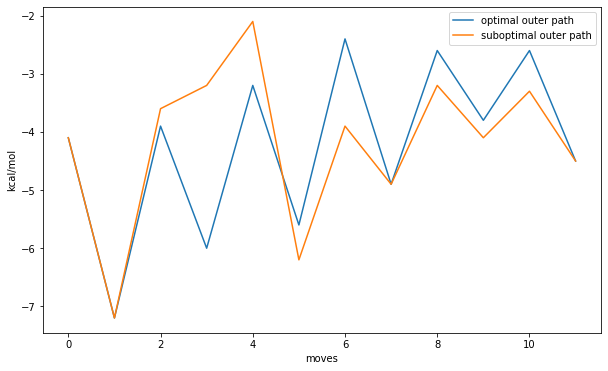

In [3]:

plot_paths = [[-8.70, -6.00, -7.90, -6.80, -5.00, -3.80, -2.10, -1.90, -1.40, -6.00, -1.40, -3.10, -4.10, -5.50, -6.30, -7.60, -7.00, -5.10],\
             [-8.70, -6.50, -4.80, -3.30, -1.60, -3.80, -2.10, -1.90, -1.40, -6.00, -4.30, -1.90, -3.80, -5.50, -6.30, -7.60, -7.00, -5.10]]

plot_paths = [[-4.10, -7.20, -3.90, -6, -3.20, -5.60, -2.40, -4.90, -2.60, -3.80, -2.60, -4.50],
             [-4.10, -7.20, -3.60, -3.20, -2.10, -6.20, -3.90, -4.90, -3.20, -4.10, -3.30, -4.50]]


title = ""
labels = ["fwd pass", "bwd pass"]
labels = ["optimal outer path", "suboptimal outer path"]

plt.figure(figsize=(10,6))

for i, path in enumerate(plot_paths):
    data = []
    for p in path:
        # data.append(p[2])
        data.append(p)
    plt.plot(data)
    # plt.plot(data, label=labels[i])
plt.ylabel('kcal/mol')
plt.xlabel('moves')
plt.title(title)
plt.legend(labels)
# plt.show()
plt.savefig("suboptimal_paths_as_input.png")

[0.9543019021997504, 0.9654544641009435, 0.9726779012601163, 0.9781395244780277, 0.982907608239696, 0.9869150358235501, 0.9930366401369181, 1.0]
[ 1.   1.5  2.   3.   4.   6.  10.  20. ]
[0.9365822164024948, 0.9486875065017842, 0.9575068155210592, 0.9658951491323524, 0.9722689616795162, 0.9822391897001831, 0.9885436498828442, 1.0]
[ 1.   1.5  2.   3.   4.   6.  10.  20. ]
[0.951187088792667, 0.9590496541640892, 0.9644154529606928, 0.9693909913962773, 0.9763481977169206, 0.9829477590957655, 0.992919080020244, 1.0]
[ 1.   1.5  2.   3.   4.   6.  10.  20. ]


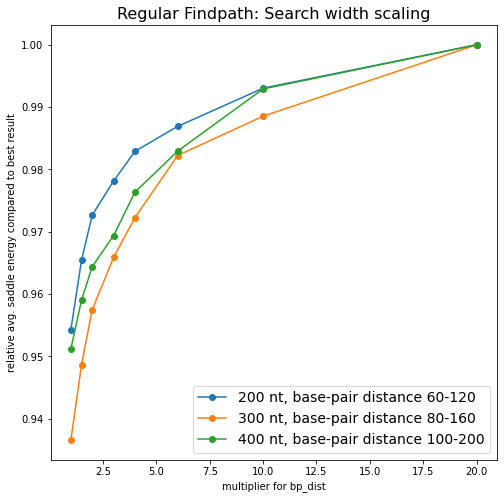

In [156]:
# diminishing bp_dist returns
plot_paths = [np.array([-34.1245, -34.5233, -34.7816, -34.9769, -35.1474, -35.2907, -35.5096, -35.7586]),
             np.array([-56.7197, -57.4528, -57.9869, -58.4949, -58.8809, -59.4847, -59.8665, -60.5603]),
             np.array([-84.5748, -85.2739, -85.751, -86.1934, -86.812, -87.3988, -88.2854, -88.915])]

labels = ["200 nt, base-pair distance 60-120",
              "300 nt, base-pair distance 80-160",
              "400 nt, base-pair distance 100-200"]


y = np.array([1, 1.5, 2, 3, 4, 6, 10, 20])

plot_paths = np.array(plot_paths)
plot_paths = -plot_paths
plot_paths = plot_paths.T / plot_paths.T.max(axis=0)
plot_paths = plot_paths.T
# print (plot_paths)



plt.figure(figsize=(8,8))

for i, path in enumerate(plot_paths):
    data = []
    for p in path:
        # data.append(p[2])
        data.append(p)
    
    print (data)
    print (y)
    plt.plot(y, data, marker="o")

title = "Regular Findpath: Search width scaling"
plt.ylabel('relative avg. saddle energy compared to best result')
plt.xlabel('multiplier for bp_dist')
plt.title(title, fontsize=16)
plt.legend(labels, fontsize=14)
# plt.show()
plt.savefig("findpath_scaling.png")

[0.9937855555400248, 0.998946088366437, 0.9995527165480899, 1.0, 1.0]
[0.2 0.4 0.6 1.  1.4]
[0.9954381482162712, 0.9984755162945766, 0.9999337180997642, 1.0, 1.0]
[0.2 0.4 0.6 1.  1.4]
[0.9953558942773723, 0.9987888856622521, 0.9996623287162413, 1.0, 1.0]
[0.2 0.4 0.6 1.  1.4]


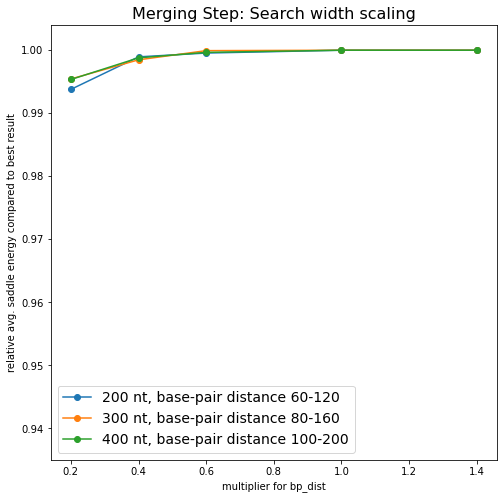

In [157]:
# diminishing bp_dist returns
plot_paths = [np.array([-35.5492, -35.7338, -35.7555, -35.7715, -35.7715]),
             np.array([-60.073, -60.2563, -60.3443, -60.3483, -60.3483]),
             np.array([-88.4312, -88.7362, -88.8138, -88.8438, -88.8438])]

labels = ["200 nt, base-pair distance 60-120",
              "300 nt, base-pair distance 80-160",
              "400 nt, base-pair distance 100-200"]


y = np.array([0.2, 0.4, 0.6, 1, 1.4])

plot_paths = np.array(plot_paths)
plot_paths = -plot_paths
plot_paths = plot_paths.T / plot_paths.T.max(axis=0)
plot_paths = plot_paths.T




plt.figure(figsize=(8,8))

for i, path in enumerate(plot_paths):
    data = []
    for p in path:
        # data.append(p[2])
        data.append(p)
    
    print (data)
    print (y)
    plt.plot(y, data, marker="o")
    # plt.plot(data, label=labels[i])
    
title = "Merging Step: Search width scaling"
plt.ylabel('relative avg. saddle energy compared to best result')
plt.xlabel('multiplier for bp_dist')
plt.title(title, fontsize=16)
plt.legend(labels, fontsize=14)

axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.935,1.004])

# plt.show()
plt.savefig("findpath_scaling_merge.png")


In [294]:
dataset_200 = [[-38.1, -45.9, -51.8, -43.19, -48.2, -36.4, -39.4, -34.5, -58.5, -26.4, -35.14, -38.8, -33.1, -40.2, -47.3, -29.2, -37.8, -36.4, -28.35, -34.5, -12.6, -37.9, -30.1, -24.5, -21.05, -30.7, -53.5, -24.5, -40.8, -27.1, -35.6, -32.37, -28.4, -21.67, -37.4, -24.8, -30.3, -46.3, -36.6, -32.1, -56.0, -21.4, -23.8, -21.9, -37.6, -33.4, -32.5, -39.0, -46.0, -33.9, -37.6, -32.7, -40.8, -35.4, -34.0, -44.3, -45.4, -26.6, -28.3, -35.67, -33.6, -50.9, -29.5, -36.9, -30.0, -35.1, -41.7, -42.0, -56.5, -34.34, -16.34, -36.5, -35.3, -29.1, -45.8, -18.7, -49.2, -33.9, -21.8, -45.5, -49.0, -46.8, -27.9, -35.7, -52.4, -45.8, -33.1, -23.7, -40.0, -33.3, -24.3, -20.9, -26.4, -41.5, -42.0, -42.2, -23.8, -29.9, -35.4, -53.9],
[-37.0, -45.1, -51.4, -42.7, -48.1, -36.9, -37.9, -35.0, -58.5, -25.7, -34.3, -38.8, -28.5, -37.3, -43.4, -27.6, -36.9, -34.4, -28.15, -34.3, -11.2, -37.6, -31.6, -23.8, -19.55, -26.4, -53.5, -23.9, -41.5, -26.6, -35.6, -32.37, -27.2, -19.97, -36.5, -24.8, -27.9, -46.3, -29.2, -31.9, -54.7, -21.4, -23.8, -21.9, -37.6, -32.67, -31.0, -35.6, -43.0, -32.7, -37.5, -32.2, -39.6, -34.6, -33.1, -44.3, -45.0, -26.4, -26.7, -36.6, -31.6, -48.7, -29.1, -35.4, -28.7, -34.6, -40.9, -41.9, -56.5, -33.74, -16.34, -36.2, -34.4, -28.3, -45.8, -18.6, -47.2, -34.6, -20.5, -45.5, -49.0, -45.6, -27.9, -34.0, -52.4, -44.7, -33.6, -23.6, -39.8, -31.6, -24.3, -17.0, -25.5, -38.8, -41.3, -39.9, -21.2, -29.1, -35.4, -53.9],
[-36.6, -45.1, -51.5, -42.7, -48.1, -36.9, -37.9, -35.0, -58.5, -24.97, -34.3, -38.5, -28.5, -37.3, -43.4, -27.5, -37.3, -34.4, -28.15, -34.1, -11.2, -37.4, -29.2, -23.8, -19.55, -28.0, -53.5, -23.9, -39.9, -26.6, -35.6, -32.37, -27.2, -19.97, -37.4, -24.8, -27.9, -46.3, -29.2, -31.0, -54.7, -21.4, -23.7, -21.9, -37.6, -32.67, -31.0, -35.6, -43.0, -32.7, -37.5, -32.1, -39.6, -34.6, -33.1, -44.3, -45.0, -25.6, -27.1, -36.6, -31.6, -50.1, -29.1, -35.4, -28.7, -34.6, -41.7, -41.9, -56.5, -33.74, -16.34, -36.0, -34.4, -28.3, -45.8, -20.4, -47.2, -33.5, -20.5, -45.5, -49.0, -45.6, -27.9, -34.0, -52.4, -44.7, -33.3, -23.6, -40.0, -31.6, -24.3, -17.0, -28.1, -41.5, -41.0, -39.9, -21.2, -27.7, -35.3, -53.5]]
print (np.mean(dataset_200[0]), np.std(dataset_200[0]), np.mean(dataset_200[2]), np.std(dataset_200[2]))

dataset_300 = [[-72.7, -54.4, -53.9, -48.02, -56.3, -77.6, -72.3, -58.8, -59.6, -85.0, -77.1, -52.5, -55.3, -57.2, -55.4, -55.8, -65.9, -57.0, -60.9, -62.27, -64.9, -50.67, -62.9, -61.2, -75.9, -65.3, -60.3, -52.1, -64.8, -39.9, -72.5, -58.8, -63.4, -73.3, -40.02, -60.9, -77.1, -46.2, -50.7, -47.3, -65.7, -58.5, -76.1, -67.6, -69.5, -43.9, -61.3, -68.6, -68.6, -71.2, -51.9, -74.1, -45.19, -50.7, -54.2, -49.5, -56.7, -66.4, -61.2, -50.9, -71.4, -57.9, -50.0, -55.4, -58.9, -45.3, -55.4, -72.1, -61.4, -43.9, -62.92, -65.9, -59.3, -68.3, -60.5, -53.6, -62.2, -67.9, -59.6, -52.6, -60.9, -67.7, -50.3, -53.4, -61.5, -68.2, -47.1, -64.54, -66.9, -69.1, -56.8, -41.7, -65.1, -64.69, -70.3, -61.6, -40.02, -49.7, -61.3, -67.0],
[-71.4, -52.1, -53.6, -45.6, -54.7, -74.7, -72.3, -53.3, -59.6, -85.0, -76.0, -45.5, -53.4, -53.97, -55.4, -55.0, -65.3, -56.0, -60.9, -59.2, -62.9, -48.4, -61.8, -63.2, -74.6, -61.5, -58.3, -52.1, -64.8, -38.4, -72.5, -59.7, -56.5, -71.5, -38.13, -60.1, -77.2, -45.4, -50.4, -45.8, -64.0, -57.5, -76.1, -58.94, -61.3, -39.4, -61.3, -66.5, -68.3, -65.1, -48.7, -74.1, -43.99, -49.6, -52.1, -49.5, -55.6, -64.0, -58.6, -50.0, -67.3, -54.5, -46.8, -54.8, -58.9, -40.2, -53.8, -69.2, -60.5, -43.7, -57.79, -65.9, -56.9, -67.5, -59.4, -56.0, -61.3, -66.2, -59.6, -50.0, -58.9, -66.8, -49.3, -50.5, -56.1, -67.1, -46.2, -62.7, -64.7, -66.64, -57.9, -39.3, -65.1, -64.05, -70.0, -58.9, -36.5, -47.1, -58.3, -67.0],
[-72.7, -53.2, -51.7, -41.5, -54.7, -74.7, -72.3, -53.3, -59.6, -85.0, -74.7, -45.1, -53.4, -53.97, -55.4, -55.0, -64.0, -57.0, -60.9, -60.3, -62.3, -48.01, -59.3, -63.2, -74.6, -61.5, -58.3, -52.1, -64.8, -36.7, -72.2, -56.6, -57.87, -73.3, -36.22, -59.5, -77.2, -40.2, -50.4, -45.4, -62.4, -57.5, -76.1, -58.87, -62.04, -37.6, -61.3, -66.5, -66.4, -61.9, -48.7, -74.1, -43.99, -49.6, -52.1, -49.5, -55.6, -64.0, -57.5, -50.9, -62.0, -53.55, -44.7, -54.8, -58.9, -44.4, -53.4, -68.5, -62.6, -43.7, -52.2, -65.9, -57.3, -67.5, -59.1, -56.0, -58.88, -65.8, -59.6, -49.2, -60.1, -66.8, -50.1, -50.5, -57.9, -67.1, -46.2, -63.8, -64.7, -67.8, -53.5, -38.7, -65.1, -64.69, -69.0, -61.6, -36.5, -47.1, -57.7, -67.0]]
print (np.mean(dataset_300[0]), np.std(dataset_300[0]), np.mean(dataset_300[2]), np.std(dataset_300[2]))

dataset_400 = [[-87.9, -101.3, -77.2, -98.5, -85.6, -102.8, -80.7, -93.8, -108.5, -95.7, -96.4, -94.1, -95.3, -85.95, -77.0, -86.0, -90.8, -85.83, -97.07, -88.2, -96.3, -100.3, -89.9, -88.7, -98.9, -92.3, -76.4, -54.3, -95.9, -96.1, -92.4, -99.4, -83.1, -87.2, -77.9, -70.1, -66.5, -78.4, -88.98, -92.3, -66.6, -98.0, -113.27, -89.1, -89.8, -81.4, -91.9, -88.8, -83.4, -80.1, -76.0, -101.7, -72.0, -84.9, -113.9, -81.1, -83.5, -85.0, -90.6, -88.7, -96.1, -92.6, -92.2, -98.9, -81.9, -60.7, -72.07, -98.7, -87.2, -87.41, -102.2, -97.6, -102.0, -108.4, -92.44, -79.1, -91.9, -93.4, -76.4, -86.3, -93.49, -76.3, -69.48, -87.94, -88.8, -69.62, -98.7, -94.8, -99.7, -95.9, -76.3, -94.81, -93.2, -76.1, -87.9, -77.4, -83.9, -85.8, -108.6, -83.1],
[-87.2, -97.8, -75.2, -95.7, -78.5, -102.9, -79.2, -93.8, -102.5, -94.1, -94.3, -92.9, -92.4, -85.55, -75.8, -84.8, -89.0, -85.33, -95.2, -83.7, -96.0, -100.0, -87.1, -83.2, -98.9, -91.6, -73.4, -50.7, -94.07, -90.3, -87.1, -97.7, -75.8, -84.9, -78.2, -64.6, -67.5, -75.8, -86.88, -88.1, -64.7, -92.4, -111.0, -83.5, -90.0, -72.3, -91.1, -91.2, -81.9, -77.9, -75.6, -100.49, -71.8, -81.8, -113.0, -78.2, -80.3, -81.4, -87.6, -84.8, -95.3, -88.8, -91.9, -96.7, -60.0, -59.1, -68.09, -95.6, -85.7, -92.3, -95.8, -97.1, -102.9, -104.8, -82.9, -78.7, -86.7, -93.4, -71.35, -82.3, -91.9, -76.7, -69.3, -83.8, -86.5, -66.32, -99.7, -97.4, -100.0, -93.4, -79.0, -93.91, -89.1, -75.6, -87.9, -74.6, -79.2, -79.5, -107.1, -78.7],
[-85.9, -100.6, -73.3, -95.7, -77.4, -101.7, -79.2, -93.8, -103.2, -94.1, -90.9, -94.1, -93.9, -83.6, -75.8, -84.8, -88.7, -85.33, -94.4, -83.7, -96.3, -98.2, -89.4, -85.0, -98.9, -93.8, -73.4, -49.47, -92.2, -88.3, -82.27, -97.7, -75.8, -81.4, -78.1, -64.28, -66.2, -75.8, -86.58, -85.5, -64.4, -92.4, -111.0, -83.5, -88.8, -72.3, -90.8, -91.2, -81.9, -77.9, -71.9, -100.49, -71.8, -81.1, -113.0, -78.3, -78.4, -81.7, -86.8, -84.8, -95.0, -87.9, -90.0, -96.7, -60.0, -57.2, -67.5, -98.0, -86.5, -86.7, -96.6, -96.8, -101.0, -104.8, -82.2, -79.8, -85.3, -93.4, -71.45, -84.7, -91.9, -76.7, -69.3, -83.8, -88.8, -66.32, -99.7, -93.0, -99.2, -93.4, -79.0, -93.91, -89.2, -75.2, -87.0, -74.6, -83.9, -78.8, -108.5, -80.1]]
print_avg (dataset_400)


to_np = lambda x: np.array([np.array(xi) for xi in x])
normalize = lambda x: x / x[2]
worse = lambda x: np.count_nonzero(x[0]<x[2])
better = lambda x: np.count_nonzero(x[0]>x[2])
avg = lambda x: (np.mean(x[0]), np.std(x[0]), np.mean(x[2]), np.std(x[2]))
print_avg = lambda x: print(f'{avg(x)[0]:4.4} +- {avg(x)[1]:4.4}; {avg(x)[2]:4.4} +- {avg(x)[3]:4.4}')

avg_all = lambda x: (np.mean(x[0]), np.std(x[0]), np.mean(x[1]), np.std(x[1]), np.mean(x[2]), np.std(x[2]))
print_avg_all = lambda x: print(f'{avg_all(x)[0]:4.4} +- {avg_all(x)[1]:4.4}; {avg_all(x)[2]:4.4} +- {avg_all(x)[3]:4.4}; {avg_all(x)[4]:4.4} +- {avg_all(x)[5]:4.4}')

dataset_200 = -to_np(dataset_200)
dataset_300 = -to_np(dataset_300)
dataset_300 = -to_np(dataset_300)

# dataset_200 = normalize(-to_np(dataset_200))
# dataset_300 = normalize(-to_np(dataset_300))
# dataset_400 = normalize(-to_np(dataset_400))

# # dataset_200
# sns.displot(dataset_200[0], bins=30)
# # sns.displot(dataset_200[2], bins=30)
# # sns.displot(dataset_300[0], bins=30)
# # sns.displot(dataset_400[0], bins=50)


better(dataset_400), worse(dataset_400)

print_avg_all(dataset_300)

-35.684200000000004 9.489849122088296 -34.7816 9.610143570207471
-60.1034 9.46336306182955 -57.9869 9.937827096000412
-88.53 +- 10.9; -85.75 +- 11.61
-60.1 +- 9.463; -58.34 +- 9.739; -57.99 +- 9.938


In [229]:
#200 with more merge search width

# 100 width
dataset_200 = [[-38.1, -45.9, -51.8, -43.19, -48.2, -36.4, -39.4, -34.5, -58.5, -26.4, -35.14, -38.8, -33.9, -40.2, -47.3, -29.2, -37.8, -36.4, -28.35, -34.5, -12.6, -37.9, -30.1, -24.5, -21.05, -30.7, -53.5, -24.5, -40.8, -27.1, -35.6, -32.37, -28.4, -21.67, -37.4, -24.8, -30.3, -46.3, -36.6, -32.1, -56.0, -21.7, -23.8, -21.9, -37.6, -33.4, -32.5, -39.0, -46.0, -33.9, -37.6, -32.7, -40.8, -35.4, -34.2, -44.3, -45.4, -26.8, -28.3, -35.7, -33.6, -50.9, -29.5, -36.9, -30.0, -35.1, -41.7, -42.0, -56.5, -34.34, -16.34, -36.5, -35.3, -29.1, -45.8, -18.7, -49.2, -34.5, -21.8, -45.5, -49.0, -46.8, -27.9, -35.7, -52.4, -45.8, -33.1, -24.2, -40.0, -33.6, -24.3, -20.9, -26.4, -41.5, -42.0, -42.2, -23.8, -29.9, -35.4, -53.9],
[-37.0, -45.1, -51.4, -42.7, -48.1, -36.9, -37.9, -35.0, -58.5, -25.7, -34.3, -38.8, -28.5, -37.3, -43.4, -27.6, -36.9, -34.4, -28.15, -34.3, -11.2, -37.6, -31.6, -23.8, -19.55, -26.4, -53.5, -23.9, -41.5, -26.6, -35.6, -32.37, -27.2, -19.97, -36.5, -24.8, -27.9, -46.3, -29.2, -31.9, -54.7, -21.4, -23.8, -21.9, -37.6, -32.67, -31.0, -35.6, -43.0, -32.7, -37.5, -32.2, -39.6, -34.6, -33.1, -44.3, -45.0, -26.4, -26.7, -36.6, -31.6, -48.7, -29.1, -35.4, -28.7, -34.6, -40.9, -41.9, -56.5, -33.74, -16.34, -36.2, -34.4, -28.3, -45.8, -18.6, -47.2, -34.6, -20.5, -45.5, -49.0, -45.6, -27.9, -34.0, -52.4, -44.7, -33.6, -23.6, -39.8, -31.6, -24.3, -17.0, -25.5, -38.8, -41.3, -39.9, -21.2, -29.1, -35.4, -53.9],
[-36.6, -45.1, -51.5, -42.7, -48.1, -36.9, -37.9, -35.0, -58.5, -24.97, -34.3, -38.5, -28.5, -37.3, -43.4, -27.5, -37.3, -34.4, -28.15, -34.1, -11.2, -37.4, -29.2, -23.8, -19.55, -28.0, -53.5, -23.9, -39.9, -26.6, -35.6, -32.37, -27.2, -19.97, -37.4, -24.8, -27.9, -46.3, -29.2, -31.0, -54.7, -21.4, -23.7, -21.9, -37.6, -32.67, -31.0, -35.6, -43.0, -32.7, -37.5, -32.1, -39.6, -34.6, -33.1, -44.3, -45.0, -25.6, -27.1, -36.6, -31.6, -50.1, -29.1, -35.4, -28.7, -34.6, -41.7, -41.9, -56.5, -33.74, -16.34, -36.0, -34.4, -28.3, -45.8, -20.4, -47.2, -33.5, -20.5, -45.5, -49.0, -45.6, -27.9, -34.0, -52.4, -44.7, -33.3, -23.6, -40.0, -31.6, -24.3, -17.0, -28.1, -41.5, -41.0, -39.9, -21.2, -27.7, -35.3, -53.5]]
print (np.mean(dataset_200[0]), np.mean(dataset_200[2]))

# 0.4 multiplier
dataset_200 = [[-38.1, -45.9, -51.8, -43.19, -48.2, -36.4, -39.4, -34.5, -58.5, -26.4, -35.14, -38.8, -33.1, -40.2, -47.3, -29.2, -37.8, -36.4, -28.35, -34.5, -12.6, -37.9, -30.1, -24.5, -21.05, -30.7, -53.5, -24.5, -40.8, -27.1, -35.6, -32.37, -28.4, -21.67, -37.4, -24.8, -30.3, -46.3, -36.6, -32.1, -56.0, -21.4, -23.8, -21.9, -37.6, -33.4, -32.5, -39.0, -46.0, -33.9, -37.6, -32.7, -40.8, -35.4, -34.0, -44.3, -45.4, -26.6, -28.3, -35.67, -33.6, -50.9, -29.5, -36.9, -30.0, -35.1, -41.7, -42.0, -56.5, -34.34, -16.34, -36.5, -35.3, -29.1, -45.8, -18.7, -49.2, -33.9, -21.8, -45.5, -49.0, -46.8, -27.9, -35.7, -52.4, -45.8, -33.1, -23.7, -40.0, -33.3, -24.3, -20.9, -26.4, -41.5, -42.0, -42.2, -23.8, -29.9, -35.4, -53.9],
[-37.0, -45.1, -51.4, -42.7, -48.1, -36.9, -37.9, -35.0, -58.5, -25.7, -34.3, -38.8, -28.5, -37.3, -43.4, -27.6, -36.9, -34.4, -28.15, -34.3, -11.2, -37.6, -31.6, -23.8, -19.55, -26.4, -53.5, -23.9, -41.5, -26.6, -35.6, -32.37, -27.2, -19.97, -36.5, -24.8, -27.9, -46.3, -29.2, -31.9, -54.7, -21.4, -23.8, -21.9, -37.6, -32.67, -31.0, -35.6, -43.0, -32.7, -37.5, -32.2, -39.6, -34.6, -33.1, -44.3, -45.0, -26.4, -26.7, -36.6, -31.6, -48.7, -29.1, -35.4, -28.7, -34.6, -40.9, -41.9, -56.5, -33.74, -16.34, -36.2, -34.4, -28.3, -45.8, -18.6, -47.2, -34.6, -20.5, -45.5, -49.0, -45.6, -27.9, -34.0, -52.4, -44.7, -33.6, -23.6, -39.8, -31.6, -24.3, -17.0, -25.5, -38.8, -41.3, -39.9, -21.2, -29.1, -35.4, -53.9],
[-36.6, -45.1, -51.5, -42.7, -48.1, -36.9, -37.9, -35.0, -58.5, -24.97, -34.3, -38.5, -28.5, -37.3, -43.4, -27.5, -37.3, -34.4, -28.15, -34.1, -11.2, -37.4, -29.2, -23.8, -19.55, -28.0, -53.5, -23.9, -39.9, -26.6, -35.6, -32.37, -27.2, -19.97, -37.4, -24.8, -27.9, -46.3, -29.2, -31.0, -54.7, -21.4, -23.7, -21.9, -37.6, -32.67, -31.0, -35.6, -43.0, -32.7, -37.5, -32.1, -39.6, -34.6, -33.1, -44.3, -45.0, -25.6, -27.1, -36.6, -31.6, -50.1, -29.1, -35.4, -28.7, -34.6, -41.7, -41.9, -56.5, -33.74, -16.34, -36.0, -34.4, -28.3, -45.8, -20.4, -47.2, -33.5, -20.5, -45.5, -49.0, -45.6, -27.9, -34.0, -52.4, -44.7, -33.3, -23.6, -40.0, -31.6, -24.3, -17.0, -28.1, -41.5, -41.0, -39.9, -21.2, -27.7, -35.3, -53.5]]
print (np.mean(dataset_200[0]), np.mean(dataset_200[2]))

# 1 multiplier
dataset_200 = [[-38.1, -45.9, -51.8, -43.19, -48.2, -36.4, -39.4, -34.5, -58.5, -26.4, -35.14, -38.8, -33.1, -40.2, -47.3, -29.2, -37.8, -36.4, -28.35, -34.5, -12.6, -37.9, -30.1, -24.5, -21.05, -30.7, -53.5, -24.5, -40.8, -27.1, -35.6, -32.37, -28.4, -21.67, -37.4, -24.8, -30.3, -46.3, -36.6, -32.1, -56.0, -21.7, -23.8, -21.9, -37.6, -33.4, -32.5, -39.0, -46.0, -33.9, -37.6, -32.7, -40.8, -35.4, -34.2, -44.3, -45.4, -26.8, -28.3, -35.7, -33.6, -50.9, -29.5, -36.9, -30.0, -35.1, -41.7, -42.0, -56.5, -34.34, -16.34, -36.5, -35.3, -29.1, -45.8, -18.7, -49.2, -34.5, -21.8, -45.5, -49.0, -46.8, -27.9, -35.7, -52.4, -45.8, -33.1, -24.2, -40.0, -33.6, -24.3, -20.9, -26.4, -41.5, -42.0, -42.2, -23.8, -29.9, -35.4, -53.9],
[-37.0, -45.1, -51.4, -42.7, -48.1, -36.9, -37.9, -35.0, -58.5, -25.7, -34.3, -38.8, -28.5, -37.3, -43.4, -27.6, -36.9, -34.4, -28.15, -34.3, -11.2, -37.6, -31.6, -23.8, -19.55, -26.4, -53.5, -23.9, -41.5, -26.6, -35.6, -32.37, -27.2, -19.97, -36.5, -24.8, -27.9, -46.3, -29.2, -31.9, -54.7, -21.4, -23.8, -21.9, -37.6, -32.67, -31.0, -35.6, -43.0, -32.7, -37.5, -32.2, -39.6, -34.6, -33.1, -44.3, -45.0, -26.4, -26.7, -36.6, -31.6, -48.7, -29.1, -35.4, -28.7, -34.6, -40.9, -41.9, -56.5, -33.74, -16.34, -36.2, -34.4, -28.3, -45.8, -18.6, -47.2, -34.6, -20.5, -45.5, -49.0, -45.6, -27.9, -34.0, -52.4, -44.7, -33.6, -23.6, -39.8, -31.6, -24.3, -17.0, -25.5, -38.8, -41.3, -39.9, -21.2, -29.1, -35.4, -53.9],
[-36.6, -45.1, -51.5, -42.7, -48.1, -36.9, -37.9, -35.0, -58.5, -24.97, -34.3, -38.5, -28.5, -37.3, -43.4, -27.5, -37.3, -34.4, -28.15, -34.1, -11.2, -37.4, -29.2, -23.8, -19.55, -28.0, -53.5, -23.9, -39.9, -26.6, -35.6, -32.37, -27.2, -19.97, -37.4, -24.8, -27.9, -46.3, -29.2, -31.0, -54.7, -21.4, -23.7, -21.9, -37.6, -32.67, -31.0, -35.6, -43.0, -32.7, -37.5, -32.1, -39.6, -34.6, -33.1, -44.3, -45.0, -25.6, -27.1, -36.6, -31.6, -50.1, -29.1, -35.4, -28.7, -34.6, -41.7, -41.9, -56.5, -33.74, -16.34, -36.0, -34.4, -28.3, -45.8, -20.4, -47.2, -33.5, -20.5, -45.5, -49.0, -45.6, -27.9, -34.0, -52.4, -44.7, -33.3, -23.6, -40.0, -31.6, -24.3, -17.0, -28.1, -41.5, -41.0, -39.9, -21.2, -27.7, -35.3, -53.5]]
print (np.mean(dataset_200[0]), np.mean(dataset_200[2]))

# reg findpath with *4 multiplier
findpath4 = [-37.4, -45.1, -51.5, -42.7, -48.1, -36.9, -38.6, -35.0, -58.5, -26.8, -34.3, -38.5, -29.5, -37.3, -43.4, -27.6, -37.7, -36.4, -28.15, -34.5, -11.2, -37.6, -32.0, -24.7, -20.0, -28.0, -53.5, -23.9, -41.5, -26.6, -35.6, -32.37, -28.1, -20.87, -37.4, -24.8, -29.2, -46.3, -29.3, -31.9, -54.7, -21.4, -23.8, -21.9, -37.6, -32.67, -31.0, -37.1, -43.0, -32.7, -38.3, -32.4, -39.6, -34.6, -34.1, -44.3, -45.0, -27.5, -27.1, -36.6, -33.6, -51.1, -29.1, -35.8, -30.0, -34.6, -40.9, -41.9, -56.5, -33.74, -16.34, -36.0, -35.1, -28.4, -45.8, -22.9, -48.3, -33.5, -20.5, -45.5, -49.0, -46.3, -27.9, -34.0, -52.4, -44.7, -33.6, -23.6, -40.0, -33.3, -24.3, -17.9, -28.1, -41.5, -41.0, -40.0, -21.2, -28.9, -35.4, -53.9]

# reg findpath with *6 multiplier
findpath6 = [-37.4, -45.1, -51.5, -42.7, -48.1, -36.9, -38.6, -35.0, -58.5, -26.8, -34.3, -38.5, -29.5, -37.3, -46.4, -27.6, -37.7, -36.4, -28.15, -34.5, -11.5, -37.6, -32.0, -24.7, -20.0, -28.0, -53.5, -23.9, -41.5, -26.6, -35.6, -32.37, -28.1, -21.67, -37.4, -24.8, -29.2, -46.3, -32.4, -32.1, -54.7, -21.4, -23.8, -21.9, -37.6, -33.1, -31.0, -37.1, -43.7, -33.0, -38.3, -32.4, -39.6, -34.8, -34.1, -44.3, -45.0, -27.5, -27.8, -36.6, -33.6, -51.1, -29.1, -35.8, -30.0, -34.6, -40.9, -42.0, -56.5, -33.74, -16.34, -36.0, -35.1, -28.8, -45.8, -22.9, -48.3, -34.6, -20.5, -45.5, -49.0, -46.3, -27.9, -34.1, -52.4, -44.7, -33.6, -23.6, -40.0, -33.3, -24.3, -18.7, -28.1, -41.5, -41.0, -40.0, -23.3, -28.9, -35.4, -53.9]

print (np.mean(findpath4))
print (np.mean(findpath6))

# dataset_200 = normalize(-to_np(dataset_200))

# dataset_200
# sns.displot(dataset_200[0], bins=30)

-35.71350000000001 -34.7816
-35.684200000000004 -34.7816
-35.70550000000001 -34.7816
-35.147400000000005
-35.29070000000001


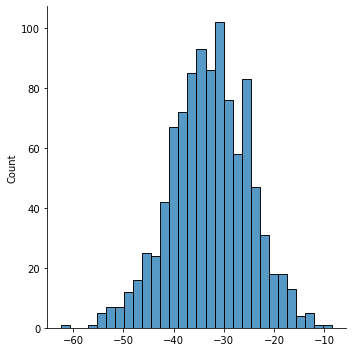

In [177]:
dataset_200r = [[-35.7, -33.2, -38.2, -40.7, -34.3, -42.99, -39.7, -34.2, -33.41, -30.2, -28.5, -41.6, -36.1, -31.3, -24.4, -25.4, -27.3, -46.5, -47.1, -39.7, -45.5, -36.5, -17.9, -33.2, -33.4, -23.2, -36.5, -32.7, -18.64, -29.0, -28.4, -51.9, -37.8, -29.44, -48.5, -33.9, -30.3, -26.6, -35.2, -28.8, -27.9, -30.4, -32.3, -23.34, -36.4, -33.4, -37.6, -8.6, -30.4, -40.4, -28.1, -36.1, -29.4, -38.2, -43.92, -23.92, -39.1, -36.6, -35.9, -29.82, -29.6, -36.1, -41.8, -38.8, -23.5, -38.1, -35.9, -25.34, -38.5, -37.3, -32.0, -35.5, -42.9, -16.9, -29.6, -40.1, -26.7, -36.5, -31.7, -40.4, -23.0, -39.3, -47.8, -28.5, -31.2, -35.6, -35.2, -38.8, -41.3, -34.4, -39.9, -34.2, -39.3, -27.34, -31.7, -40.0, -44.1, -37.4, -44.5, -42.07, -50.0, -49.5, -26.4, -35.9, -24.1, -39.8, -34.44, -28.5, -41.7, -26.6, -39.1, -29.4, -42.2, -27.17, -26.8, -18.5, -42.8, -27.1, -50.2, -23.7, -32.8, -38.9, -29.3, -25.3, -41.7, -37.8, -38.3, -31.6, -34.4, -31.6, -27.6, -39.8, -38.1, -40.1, -41.8, -29.7, -50.5, -26.4, -29.3, -36.4, -47.0, -40.8, -25.6, -33.4, -39.7, -21.2, -21.9, -46.6, -62.4, -29.9, -37.0, -35.3, -29.6, -27.7, -35.5, -27.3, -40.4, -31.2, -29.8, -18.33, -37.3, -21.7, -19.8, -25.7, -37.0, -41.9, -37.1, -36.8, -39.4, -33.3, -33.3, -32.7, -31.2, -31.7, -43.0, -23.52, -38.3, -43.0, -29.8, -25.4, -19.0, -29.02, -37.5, -35.8, -36.7, -38.8, -32.6, -34.7, -49.5, -23.3, -31.2, -27.1, -39.6, -44.7, -34.8, -36.1, -36.7, -44.6, -23.8, -33.9, -30.7, -45.8, -25.6, -35.1, -26.0, -38.6, -30.9, -44.5, -18.3, -40.0, -48.1, -27.3, -38.3, -40.2, -31.6, -27.0, -26.2, -20.5, -41.5, -38.2, -30.2, -32.4, -21.9, -32.5, -35.5, -39.6, -24.2, -27.7, -34.3, -30.9, -50.0, -32.6, -33.8, -38.1, -41.5, -42.5, -27.9, -31.8, -34.5, -37.3, -27.9, -31.6, -22.8, -34.3, -31.3, -33.3, -41.0, -31.2, -30.7, -25.2, -35.2, -42.8, -26.7, -31.9, -37.6, -34.3, -39.4, -30.4, -42.6, -15.8, -34.8, -19.3, -35.3, -25.3, -29.1, -26.2, -28.57, -40.2, -47.6, -33.5, -43.8, -31.2, -37.9, -38.3, -38.3, -22.1, -22.7, -46.0, -29.1, -29.3, -31.2, -12.1, -14.4, -31.5, -33.6, -34.4, -26.9, -30.2, -34.3, -42.2, -31.6, -37.97, -31.2, -34.0, -32.4, -46.0, -33.2, -32.2, -12.7, -33.0, -55.1, -27.5, -40.1, -31.8, -50.1, -21.0, -44.7, -34.8, -40.8, -32.9, -36.5, -34.3, -24.37, -29.0, -31.1, -20.2, -23.91, -36.9, -24.4, -47.5, -36.3, -38.8, -32.4, -44.6, -32.0, -42.1, -40.5, -39.3, -16.2, -29.3, -52.0, -43.2, -39.0, -28.0, -53.3, -28.8, -25.4, -31.6, -30.8, -35.2, -27.6, -38.6, -39.9, -42.1, -40.0, -32.3, -31.7, -42.6, -26.9, -41.3, -24.7, -20.3, -26.0, -33.2, -26.2, -42.6, -35.0, -23.4, -27.6, -36.3, -32.5, -36.2, -34.7, -31.0, -21.6, -41.8, -34.8, -42.2, -47.5, -30.1, -28.4, -36.8, -22.7, -26.0, -25.5, -34.7, -39.4, -33.9, -23.24, -35.5, -22.2, -30.3, -25.1, -17.3, -40.3, -26.4, -29.2, -44.4, -22.4, -40.1, -18.4, -20.9, -26.6, -39.5, -41.0, -35.3, -52.5, -28.1, -36.0, -19.6, -24.1, -41.5, -33.7, -29.1, -23.8, -47.6, -34.5, -21.9, -55.6, -30.4, -30.7, -36.5, -38.7, -32.1, -26.5, -29.5, -17.3, -29.9, -40.4, -30.3, -17.3, -29.3, -21.4, -39.4, -33.5, -33.0, -29.1, -35.5, -34.9, -34.7, -36.7, -38.6, -35.0, -38.3, -29.1, -32.5, -42.3, -32.8, -41.8, -29.3, -41.0, -37.2, -35.5, -35.7, -40.5, -26.0, -35.9, -29.3, -27.3, -37.1, -35.6, -22.7, -38.6, -22.8, -37.3, -28.5, -34.7, -33.4, -27.8, -32.0, -33.47, -39.1, -25.0, -35.0, -31.4, -24.5, -41.8, -18.2, -44.2, -31.5, -26.0, -39.9, -38.2, -32.1, -25.8, -30.91, -18.4, -32.7, -27.5, -41.5, -34.7, -21.3, -39.4, -35.2, -35.6, -40.6, -21.5, -41.4, -25.6, -39.8, -32.6, -33.2, -19.2, -30.5, -31.8, -52.3, -44.6, -32.8, -31.0, -26.2, -30.3, -26.7, -26.5, -36.9, -47.6, -39.2, -27.0, -35.8, -42.7, -36.4, -34.3, -24.4, -32.7, -39.4, -33.1, -28.0, -33.8, -27.3, -35.3, -30.2, -41.9, -24.0, -45.9, -34.4, -37.0, -43.2, -25.8, -29.6, -54.2, -22.6, -34.2, -41.5, -39.8, -40.7, -44.5, -26.8, -29.9, -40.3, -34.6, -39.7, -35.9, -35.4, -32.2, -36.8, -29.2, -40.2, -22.9, -50.5, -45.9, -40.3, -31.9, -35.4, -25.7, -35.5, -32.1, -32.0, -26.2, -34.1, -39.0, -35.97, -29.7, -37.5, -34.9, -32.4, -34.0, -42.7, -45.0, -47.8, -40.5, -30.6, -30.3, -34.6, -22.6, -30.8, -25.3, -44.1, -35.8, -36.5, -36.4, -26.7, -42.7, -35.7, -40.1, -26.8, -27.4, -32.0, -38.2, -37.6, -30.7, -39.5, -36.8, -37.2, -38.3, -53.5, -26.6, -24.3, -25.8, -21.0, -30.4, -34.7, -31.4, -32.5, -42.7, -38.4, -36.6, -38.8, -29.5, -15.7, -36.3, -39.6, -33.0, -21.1, -50.3, -36.7, -22.54, -35.6, -34.9, -33.5, -29.6, -37.8, -39.2, -38.7, -23.8, -35.9, -28.0, -28.7, -36.6, -21.2, -33.7, -21.9, -37.74, -33.1, -39.3, -24.7, -48.1, -32.4, -40.8, -40.2, -40.4, -33.8, -52.7, -36.6, -30.5, -45.7, -40.9, -32.2, -45.8, -37.8, -26.1, -33.4, -33.3, -30.6, -33.1, -37.5, -29.5, -39.2, -49.2, -25.7, -44.1, -46.1, -31.6, -32.7, -22.9, -30.94, -40.7, -19.3, -26.4, -36.1, -33.5, -24.6, -26.3, -18.9, -53.4, -30.8, -38.5, -39.4, -31.4, -19.5, -35.6, -35.5, -29.5, -40.4, -29.3, -31.3, -29.5, -46.2, -38.4, -30.9, -33.1, -27.1, -34.2, -20.2, -45.0, -35.2, -37.6, -26.9, -17.2, -39.1, -40.7, -26.5, -31.0, -41.2, -31.5, -26.0, -47.5, -24.7, -37.0, -42.3, -46.4, -31.6, -44.4, -30.2, -41.6, -32.5, -29.0, -30.6, -32.6, -33.6, -36.3, -40.8, -37.0, -42.5, -36.0, -25.8, -24.5, -32.27, -37.8, -26.4, -41.9, -32.1, -17.7, -24.5, -25.17, -31.9, -33.4, -25.4, -33.6, -26.1, -33.8, -36.4, -26.17, -35.5, -45.2, -41.1, -47.6, -32.6, -38.9, -31.8, -54.4, -36.6, -26.7, -20.8, -46.3, -32.3, -37.1, -37.2, -24.9, -31.4, -28.18, -31.5, -38.1, -32.1, -47.9, -35.9, -25.1, -39.2, -24.3, -37.8, -35.5, -51.8, -27.4, -46.4, -41.0, -43.2, -29.45, -39.8, -14.2, -31.2, -35.5, -31.8, -32.7, -48.0, -35.5, -24.1, -31.7, -32.6, -54.2, -40.7, -30.3, -39.0, -22.1, -23.8, -34.07, -10.8, -48.4, -24.7, -43.2, -32.2, -37.7, -26.4, -32.7, -39.7, -17.8, -32.1, -34.9, -34.2, -29.4, -30.5, -53.6, -41.5, -44.0, -23.3, -25.1, -35.0, -32.0, -32.7, -36.4, -28.7, -39.0, -39.6, -34.6, -28.6, -17.7, -38.2, -36.9, -33.2, -47.6, -45.7, -37.0, -36.0, -35.4, -32.9, -52.8, -46.9, -20.0, -44.4, -42.4, -26.8, -20.8, -30.5, -26.0, -27.29, -21.7, -32.3, -39.6, -26.87, -24.8, -37.5, -17.8, -26.8, -28.9, -43.2, -29.5, -35.5, -39.9, -48.7, -32.7, -31.8, -19.2, -51.3, -51.2, -26.8, -32.8, -31.1, -42.0, -26.24, -35.3, -29.7, -12.8, -33.0, -20.4, -25.39, -33.8, -23.1, -38.3, -30.3, -34.1, -39.27, -45.7, -33.6, -40.5, -33.4, -37.3, -46.9, -38.4, -36.0, -23.7, -26.1, -32.5, -28.4, -33.9, -31.5, -40.6, -52.6, -26.4, -33.4, -28.1, -31.37, -31.0, -38.0, -23.4, -21.7, -42.0, -32.2, -33.2, -33.4, -34.4, -29.2, -36.0, -39.4, -38.8, -31.2, -43.4, -37.7, -26.8, -34.4, -27.3, -36.6, -35.6, -29.7, -34.8, -39.9, -30.1, -34.9, -37.6, -42.3, -28.4, -27.6, -23.3, -33.3, -37.0, -32.3, -44.0, -29.7, -37.6, -35.9, -25.9, -29.2, -37.4, -33.9, -31.0, -32.5, -21.0, -39.0, -37.6, -33.6, -35.5, -26.3, -37.3, -28.3, -38.3, -25.7, -46.2, -20.2, -35.8, -20.2, -39.7, -29.3, -24.42, -47.1, -14.6, -51.1, -27.7, -25.8, -35.3, -28.8, -30.3, -25.5, -18.4, -43.9, -42.6, -41.3, -34.5, -33.0, -26.54, -36.37, -30.7, -26.7, -33.0, -31.5, -27.5, -16.99, -26.07, -28.3, -32.5, -34.7, -30.2, -43.0, -34.5, -20.4, -36.2, -46.2, -25.56, -45.0, -37.0, -41.4, -23.0, -41.5, -33.6, -25.2],
[-35.7, -32.0, -38.2, -39.6, -34.3, -44.0, -39.7, -31.1, -33.41, -30.2, -28.5, -40.4, -36.1, -32.2, -25.1, -24.5, -28.6, -46.5, -47.1, -39.7, -43.5, -35.59, -17.9, -33.2, -33.4, -22.9, -36.5, -30.9, -16.84, -27.5, -25.37, -50.4, -33.72, -29.44, -50.4, -35.6, -28.9, -26.5, -34.6, -27.5, -27.8, -30.3, -32.3, -21.0, -36.6, -31.2, -36.0, -8.5, -28.1, -39.8, -27.4, -36.6, -29.4, -37.7, -43.3, -23.0, -38.0, -33.9, -33.8, -29.6, -28.9, -36.1, -41.1, -38.1, -23.5, -34.5, -32.7, -25.34, -38.4, -36.3, -31.8, -34.4, -41.8, -12.7, -29.09, -39.5, -26.7, -35.5, -32.8, -39.4, -21.7, -37.4, -46.9, -28.1, -31.2, -35.4, -35.2, -38.8, -41.3, -33.9, -39.9, -31.6, -39.0, -27.34, -31.7, -39.1, -44.1, -37.4, -42.3, -42.5, -50.0, -48.4, -25.6, -33.99, -24.4, -39.8, -34.04, -28.2, -41.7, -25.0, -40.4, -28.9, -40.2, -27.5, -26.8, -17.8, -42.8, -27.1, -49.2, -23.3, -32.8, -35.7, -28.8, -25.3, -42.2, -37.7, -38.3, -31.3, -33.5, -29.4, -26.8, -39.8, -37.8, -40.1, -38.2, -29.5, -49.2, -25.9, -29.0, -35.7, -47.0, -40.4, -24.4, -33.2, -39.5, -20.02, -21.9, -42.67, -62.4, -29.9, -35.3, -34.8, -28.7, -27.6, -34.2, -27.3, -40.4, -26.9, -29.8, -17.5, -36.3, -19.1, -21.3, -25.7, -35.6, -38.7, -37.1, -35.4, -38.4, -32.1, -30.4, -32.7, -31.2, -32.8, -41.9, -23.52, -37.2, -42.7, -28.7, -25.0, -18.7, -29.02, -36.4, -34.6, -36.5, -38.7, -32.6, -33.8, -49.5, -20.9, -28.0, -27.1, -39.0, -44.7, -34.6, -33.8, -35.8, -44.3, -26.7, -33.9, -29.7, -43.4, -24.6, -30.5, -25.8, -37.6, -31.3, -44.3, -15.3, -38.9, -47.4, -27.3, -37.3, -40.2, -31.5, -26.3, -25.5, -19.8, -41.5, -38.2, -30.2, -30.5, -21.9, -28.9, -35.5, -39.5, -24.2, -26.7, -32.9, -28.6, -49.6, -31.0, -33.6, -35.1, -41.1, -42.5, -25.8, -31.8, -34.28, -37.3, -25.9, -31.5, -21.3, -35.8, -28.7, -29.0, -41.0, -31.0, -26.2, -24.1, -34.4, -42.1, -26.1, -31.8, -36.9, -34.3, -39.4, -30.4, -40.5, -15.8, -34.3, -18.6, -35.3, -25.3, -28.3, -23.9, -27.07, -39.1, -44.5, -33.5, -46.0, -29.3, -37.7, -38.3, -38.3, -20.3, -25.7, -46.0, -28.6, -28.0, -31.2, -12.1, -13.6, -35.7, -32.2, -32.8, -25.5, -30.4, -34.3, -40.7, -29.5, -37.27, -30.7, -33.1, -31.8, -45.8, -32.9, -32.2, -11.5, -32.2, -53.9, -26.1, -39.3, -31.8, -48.7, -21.1, -44.7, -34.5, -40.1, -32.0, -35.3, -34.3, -27.5, -28.5, -31.1, -17.6, -23.91, -35.5, -24.4, -47.5, -36.3, -38.8, -32.4, -44.6, -32.0, -42.2, -40.3, -39.3, -16.2, -29.3, -51.8, -42.1, -38.6, -27.5, -51.7, -28.8, -24.6, -31.6, -28.4, -35.2, -27.8, -36.4, -39.9, -38.18, -40.0, -32.3, -31.0, -41.8, -24.9, -40.5, -24.5, -20.3, -24.5, -31.4, -25.3, -41.5, -34.6, -22.7, -27.3, -35.5, -31.4, -37.2, -34.6, -30.5, -21.9, -40.5, -33.4, -42.2, -48.4, -28.4, -27.3, -35.51, -21.5, -26.0, -25.1, -32.8, -37.9, -34.0, -20.1, -33.5, -21.8, -30.3, -24.5, -17.3, -40.3, -26.4, -29.1, -44.1, -22.4, -41.4, -18.0, -20.9, -26.5, -39.1, -41.0, -35.3, -51.5, -28.1, -36.0, -19.6, -24.1, -41.3, -33.7, -28.8, -24.4, -46.8, -34.2, -21.3, -54.1, -30.4, -29.9, -35.4, -38.0, -34.6, -26.5, -25.8, -19.2, -28.2, -39.0, -30.3, -16.4, -29.3, -21.4, -37.3, -33.7, -29.5, -27.3, -33.8, -34.3, -34.7, -35.2, -37.1, -35.0, -38.3, -27.7, -32.5, -39.0, -32.7, -41.1, -28.3, -39.4, -35.6, -35.5, -35.7, -40.5, -27.2, -35.6, -28.2, -27.3, -36.0, -35.1, -20.4, -38.6, -22.8, -36.9, -27.5, -30.6, -33.4, -29.19, -31.8, -30.1, -38.5, -25.0, -34.9, -29.9, -24.2, -41.8, -18.2, -44.2, -31.5, -23.6, -38.5, -36.5, -30.9, -25.7, -26.81, -18.4, -32.7, -26.9, -41.5, -34.7, -20.0, -39.4, -34.4, -35.6, -39.8, -21.1, -41.4, -24.4, -37.1, -32.6, -30.8, -18.0, -30.2, -31.8, -51.9, -42.6, -32.4, -31.0, -25.5, -29.7, -26.3, -26.4, -36.9, -46.5, -38.1, -27.0, -35.0, -42.0, -36.4, -32.8, -24.4, -32.7, -39.4, -32.6, -30.0, -33.4, -26.2, -35.9, -28.7, -41.9, -21.5, -46.6, -34.4, -37.0, -42.2, -25.8, -26.28, -52.8, -22.6, -33.6, -41.5, -40.3, -40.2, -43.0, -26.8, -29.9, -38.3, -31.2, -39.7, -34.8, -35.4, -30.6, -36.8, -28.9, -40.3, -22.5, -48.7, -45.9, -39.2, -29.5, -34.0, -26.2, -35.2, -32.1, -31.3, -26.2, -34.1, -39.0, -34.97, -29.1, -36.8, -33.5, -32.4, -34.0, -42.6, -45.0, -46.9, -39.6, -28.4, -30.1, -33.9, -22.2, -30.3, -25.3, -40.7, -35.8, -37.8, -35.1, -26.7, -42.2, -35.6, -38.3, -23.7, -26.9, -32.0, -37.2, -36.9, -30.4, -34.8, -35.6, -37.2, -38.3, -54.2, -27.1, -23.3, -24.1, -20.3, -30.4, -32.4, -28.2, -30.0, -42.1, -37.3, -36.4, -37.5, -29.5, -15.7, -34.4, -36.6, -32.7, -21.1, -49.1, -36.7, -22.14, -34.8, -34.3, -33.5, -29.6, -38.6, -39.2, -35.4, -22.7, -34.5, -26.4, -25.7, -36.1, -20.9, -33.7, -21.4, -36.74, -32.9, -39.0, -24.7, -48.0, -29.4, -36.9, -41.3, -37.9, -32.8, -52.5, -36.2, -29.5, -45.7, -40.9, -32.2, -41.5, -37.5, -26.1, -33.2, -34.0, -30.0, -31.6, -36.7, -29.5, -39.2, -49.2, -24.9, -42.5, -43.8, -31.6, -32.7, -22.4, -28.84, -40.7, -18.1, -22.8, -35.2, -32.3, -25.1, -24.0, -18.9, -53.8, -30.2, -38.0, -35.3, -31.4, -18.7, -35.2, -35.5, -27.8, -39.9, -25.1, -31.3, -29.5, -45.6, -37.9, -27.7, -32.8, -27.0, -34.2, -19.5, -45.0, -33.3, -37.6, -24.9, -16.1, -37.9, -40.4, -26.1, -30.7, -39.2, -31.5, -26.0, -47.5, -24.2, -35.7, -39.7, -46.4, -31.1, -44.4, -30.2, -41.6, -32.0, -29.0, -29.3, -32.3, -33.6, -35.1, -39.8, -37.0, -42.5, -34.4, -24.9, -23.4, -32.4, -39.5, -25.1, -41.9, -27.9, -17.0, -23.3, -24.57, -32.6, -30.8, -25.4, -33.1, -25.9, -30.51, -36.4, -26.17, -35.1, -44.8, -41.1, -46.7, -30.57, -38.5, -31.8, -54.4, -34.6, -23.5, -19.8, -45.4, -29.9, -35.9, -36.9, -24.9, -30.4, -30.3, -30.6, -34.5, -30.4, -49.2, -35.3, -24.2, -38.68, -22.8, -37.8, -35.9, -49.5, -24.6, -44.0, -40.35, -43.2, -28.83, -39.8, -14.2, -31.2, -35.47, -31.8, -32.4, -47.5, -31.97, -24.1, -31.7, -31.4, -52.9, -40.4, -27.9, -37.6, -22.0, -23.8, -32.3, -10.4, -45.4, -24.4, -40.9, -31.7, -36.5, -26.4, -32.7, -36.8, -17.1, -30.9, -32.8, -34.2, -27.4, -28.6, -53.9, -40.9, -41.7, -22.7, -24.9, -34.0, -31.4, -32.7, -36.4, -28.4, -39.0, -39.1, -32.9, -27.8, -18.5, -38.2, -35.7, -30.9, -47.3, -43.9, -37.0, -35.1, -34.9, -32.9, -52.8, -45.4, -19.08, -40.5, -40.7, -26.3, -20.8, -30.5, -25.3, -26.9, -21.7, -32.3, -38.4, -26.87, -23.6, -37.5, -15.0, -26.1, -28.1, -39.94, -29.21, -35.3, -39.8, -47.7, -32.7, -29.9, -19.2, -47.84, -51.2, -25.3, -32.3, -30.7, -41.2, -25.3, -34.2, -29.7, -12.2, -33.0, -21.2, -24.2, -33.8, -22.6, -38.6, -28.2, -31.1, -39.27, -45.7, -33.3, -40.2, -31.2, -35.7, -45.6, -38.4, -33.9, -23.1, -25.0, -32.5, -28.4, -33.9, -29.9, -40.6, -51.6, -25.82, -33.0, -26.3, -31.37, -30.6, -38.0, -26.8, -20.6, -38.3, -31.9, -31.7, -33.3, -31.7, -28.3, -34.9, -38.8, -36.7, -30.5, -39.9, -34.3, -26.8, -32.9, -27.3, -36.7, -35.3, -29.5, -33.1, -39.9, -30.1, -34.9, -37.5, -42.3, -28.4, -27.6, -23.4, -30.4, -37.0, -32.0, -43.8, -29.7, -37.2, -34.7, -25.9, -29.0, -37.2, -32.7, -31.0, -31.3, -20.6, -37.7, -37.6, -33.2, -31.4, -26.3, -35.9, -26.1, -38.3, -25.7, -46.2, -18.6, -35.6, -20.2, -37.5, -28.1, -24.5, -45.7, -15.1, -51.1, -30.6, -24.1, -35.0, -28.6, -26.84, -25.5, -18.4, -43.8, -42.1, -41.1, -34.6, -31.9, -26.2, -35.5, -30.7, -26.7, -33.0, -29.8, -27.2, -15.25, -25.87, -28.3, -32.3, -28.64, -30.2, -43.9, -34.5, -19.2, -36.2, -45.7, -25.36, -45.0, -37.0, -38.7, -23.0, -38.8, -32.8, -26.5],
[-35.7, -32.0, -38.2, -40.7, -34.3, -44.0, -38.8, -31.1, -33.41, -30.2, -28.5, -40.4, -36.1, -31.3, -25.1, -23.8, -26.6, -46.5, -47.1, -39.7, -43.5, -35.59, -17.9, -33.2, -31.4, -22.9, -36.5, -30.9, -16.84, -27.5, -25.37, -50.4, -33.92, -29.44, -45.3, -35.6, -28.9, -26.5, -35.6, -28.9, -27.8, -30.3, -32.3, -20.0, -38.4, -32.74, -37.6, -8.5, -28.1, -39.2, -25.5, -36.6, -29.4, -37.8, -43.92, -23.0, -38.0, -36.6, -33.8, -29.82, -28.9, -36.1, -41.1, -38.1, -23.5, -34.1, -32.7, -25.34, -38.4, -36.3, -31.8, -33.0, -39.44, -12.7, -29.6, -38.6, -26.7, -35.5, -32.8, -39.4, -21.7, -37.4, -46.9, -28.1, -31.2, -34.4, -35.0, -38.8, -41.3, -33.9, -39.9, -31.6, -39.0, -27.34, -31.0, -39.1, -43.1, -37.4, -43.9, -42.5, -50.0, -48.4, -26.4, -33.99, -24.4, -39.8, -34.04, -24.9, -41.7, -25.0, -39.1, -28.9, -40.2, -28.0, -26.8, -17.8, -42.8, -27.1, -49.2, -23.7, -32.47, -35.7, -29.9, -25.3, -42.2, -37.7, -38.3, -31.3, -33.5, -29.4, -26.8, -39.8, -37.5, -40.1, -39.1, -29.5, -49.2, -25.1, -29.0, -35.7, -47.0, -40.4, -24.4, -33.2, -38.5, -19.92, -21.8, -46.6, -62.4, -29.9, -35.3, -34.8, -28.8, -27.6, -34.2, -27.3, -40.4, -28.1, -29.8, -17.5, -35.2, -17.4, -19.5, -25.7, -35.5, -38.7, -37.1, -35.4, -39.4, -31.8, -30.3, -32.2, -31.2, -32.8, -40.4, -23.52, -38.1, -42.7, -26.0, -23.1, -18.7, -29.0, -36.4, -36.8, -36.5, -36.8, -32.6, -33.8, -49.5, -24.7, -28.0, -27.1, -37.9, -44.7, -34.6, -33.8, -35.2, -44.3, -24.27, -33.9, -29.7, -43.4, -24.6, -34.0, -26.0, -37.6, -30.7, -44.3, -15.3, -38.9, -47.4, -26.2, -38.0, -35.8, -31.5, -26.3, -25.5, -19.8, -41.5, -38.2, -30.2, -30.5, -21.9, -29.8, -35.5, -39.5, -23.8, -26.7, -34.0, -28.5, -49.6, -31.0, -32.8, -35.1, -41.1, -40.2, -27.2, -31.8, -30.6, -36.1, -25.9, -31.5, -21.3, -34.7, -28.7, -29.0, -41.0, -31.0, -24.4, -25.0, -32.7, -42.1, -26.1, -31.8, -36.9, -34.3, -39.4, -29.7, -40.5, -15.8, -34.3, -18.6, -34.4, -25.3, -28.3, -24.8, -27.07, -37.8, -44.5, -33.5, -43.9, -29.3, -37.7, -38.3, -38.3, -20.3, -22.0, -45.3, -32.0, -28.0, -31.2, -12.1, -13.6, -35.7, -32.2, -33.3, -25.5, -30.2, -34.3, -40.7, -29.5, -37.0, -30.7, -33.1, -29.8, -45.8, -32.9, -32.2, -12.6, -32.2, -53.9, -26.1, -39.3, -31.8, -50.8, -21.1, -44.7, -34.5, -40.1, -28.9, -35.3, -34.3, -22.0, -27.87, -31.1, -17.6, -23.91, -36.4, -24.4, -47.5, -36.3, -38.8, -32.4, -44.6, -32.0, -42.2, -40.3, -39.3, -16.2, -29.3, -51.8, -42.1, -38.6, -28.1, -51.7, -28.8, -24.6, -31.5, -28.4, -35.2, -27.6, -36.4, -39.4, -37.84, -41.0, -34.1, -31.0, -44.7, -24.9, -40.3, -24.5, -20.3, -23.4, -31.8, -25.3, -41.5, -34.6, -22.7, -27.0, -36.0, -28.7, -37.2, -34.6, -30.5, -21.9, -39.3, -33.4, -42.2, -46.8, -27.4, -27.3, -35.51, -22.1, -23.7, -25.1, -33.47, -37.2, -34.0, -20.1, -33.5, -21.8, -25.21, -24.0, -17.3, -40.3, -26.1, -29.1, -44.1, -22.4, -40.1, -18.0, -20.9, -26.5, -39.5, -40.0, -35.3, -51.5, -28.1, -36.0, -19.6, -23.4, -41.3, -33.7, -28.8, -23.8, -46.8, -34.2, -21.3, -56.3, -30.4, -29.9, -35.4, -38.0, -34.6, -26.5, -25.8, -15.7, -27.9, -40.4, -31.5, -16.4, -29.2, -21.4, -37.3, -33.5, -29.5, -27.3, -32.5, -34.3, -34.54, -35.2, -38.6, -32.8, -38.3, -27.7, -32.5, -39.0, -32.8, -41.1, -28.3, -38.5, -36.3, -35.5, -35.7, -39.5, -27.2, -35.7, -28.2, -27.2, -35.1, -35.1, -20.4, -38.6, -22.8, -36.9, -27.5, -30.6, -33.4, -27.8, -31.8, -30.1, -38.5, -23.3, -34.9, -28.9, -24.2, -41.8, -18.2, -44.2, -31.5, -24.8, -38.4, -36.5, -30.7, -25.8, -26.81, -17.6, -32.7, -26.9, -41.5, -34.7, -22.3, -39.4, -34.4, -35.6, -39.8, -21.3, -41.4, -25.0, -37.1, -32.6, -30.8, -18.0, -30.2, -31.2, -50.7, -42.6, -31.5, -31.0, -25.5, -29.7, -26.3, -26.4, -36.9, -44.4, -38.5, -27.0, -34.0, -42.7, -36.4, -34.7, -24.4, -31.3, -37.2, -31.4, -30.0, -33.4, -26.2, -36.1, -28.7, -41.9, -21.6, -45.9, -34.4, -35.2, -42.5, -25.8, -26.28, -54.2, -22.6, -33.6, -41.5, -39.7, -40.2, -43.0, -25.6, -29.9, -38.3, -30.8, -39.7, -34.8, -35.4, -30.5, -36.5, -28.9, -39.9, -22.9, -48.7, -45.9, -39.2, -31.2, -32.4, -25.7, -35.2, -32.8, -31.3, -26.8, -34.1, -39.0, -34.97, -29.1, -36.8, -33.5, -32.4, -31.0, -42.7, -45.0, -45.1, -39.6, -28.4, -30.1, -34.6, -22.8, -30.1, -25.3, -42.3, -34.2, -36.0, -35.1, -25.8, -42.2, -35.6, -39.9, -23.7, -26.9, -29.58, -37.2, -36.9, -30.4, -34.8, -35.6, -37.2, -37.9, -53.8, -26.0, -23.3, -24.1, -19.5, -30.4, -32.4, -26.3, -30.45, -41.1, -37.3, -36.4, -37.5, -31.7, -15.7, -34.4, -36.6, -32.5, -21.1, -49.1, -36.7, -22.14, -34.8, -34.3, -32.3, -29.6, -38.6, -39.2, -35.7, -23.8, -34.5, -26.4, -25.7, -35.6, -20.5, -33.7, -21.4, -36.74, -32.9, -31.09, -24.7, -47.9, -31.77, -36.9, -41.3, -37.9, -32.8, -52.5, -36.2, -28.3, -45.7, -40.9, -32.1, -41.5, -37.5, -26.1, -33.2, -34.2, -30.6, -31.6, -36.7, -29.5, -41.4, -49.2, -24.9, -42.5, -45.9, -28.8, -32.7, -22.4, -28.84, -40.7, -18.1, -24.8, -35.2, -32.3, -25.1, -24.0, -18.9, -53.1, -29.1, -38.0, -39.4, -31.4, -18.7, -34.2, -35.5, -27.8, -40.4, -25.1, -31.3, -29.5, -45.6, -37.9, -27.7, -32.8, -27.0, -34.2, -19.6, -45.0, -33.3, -37.6, -24.9, -15.7, -37.9, -39.9, -26.1, -30.7, -42.0, -31.5, -26.0, -47.5, -21.7, -35.7, -39.7, -46.4, -31.3, -44.3, -30.2, -41.6, -30.2, -29.0, -29.5, -32.3, -33.6, -35.1, -39.8, -37.0, -42.5, -32.3, -24.9, -23.4, -31.5, -37.3, -25.1, -41.9, -27.9, -17.0, -23.1, -24.57, -31.9, -32.9, -25.4, -31.4, -25.9, -30.4, -36.1, -26.17, -35.1, -44.8, -41.1, -46.7, -30.57, -38.5, -31.8, -54.4, -34.6, -23.6, -19.8, -45.9, -30.5, -36.0, -36.9, -24.9, -30.4, -30.3, -30.6, -36.7, -30.4, -49.2, -35.3, -23.7, -39.2, -22.8, -36.4, -35.9, -49.5, -24.6, -44.0, -39.2, -43.2, -28.83, -39.8, -14.2, -31.2, -34.0, -31.8, -32.4, -47.5, -31.97, -25.4, -31.7, -32.2, -52.9, -40.4, -29.7, -39.0, -22.0, -23.8, -32.3, -11.2, -45.2, -24.4, -40.9, -31.7, -36.5, -26.4, -32.7, -36.8, -17.1, -32.1, -32.0, -34.2, -29.9, -30.5, -53.9, -40.9, -39.4, -22.7, -24.9, -35.0, -31.0, -32.6, -34.2, -25.9, -39.0, -39.1, -34.8, -27.8, -16.9, -38.2, -35.7, -30.9, -47.6, -43.3, -37.0, -35.1, -34.9, -32.9, -52.8, -45.4, -19.08, -40.5, -40.3, -23.1, -20.8, -30.5, -25.3, -25.99, -21.7, -32.3, -39.6, -26.57, -24.8, -37.5, -16.3, -26.8, -28.1, -39.94, -29.21, -35.3, -39.8, -48.7, -32.7, -29.7, -19.2, -48.34, -51.2, -25.3, -32.3, -30.7, -41.2, -25.0, -34.2, -29.7, -12.2, -33.0, -21.2, -24.2, -33.2, -21.5, -38.6, -30.0, -29.9, -38.8, -45.7, -30.19, -40.7, -31.6, -35.7, -45.6, -38.1, -32.2, -23.1, -25.6, -32.5, -28.4, -33.9, -29.9, -40.6, -52.6, -25.82, -32.2, -26.3, -31.37, -29.7, -38.0, -24.5, -19.5, -38.2, -32.2, -31.7, -33.3, -31.7, -28.3, -34.0, -38.8, -37.7, -30.5, -39.9, -34.3, -26.8, -32.9, -27.3, -35.0, -35.3, -29.5, -33.1, -39.6, -30.1, -34.9, -37.5, -42.3, -28.4, -27.0, -23.3, -29.31, -37.0, -32.0, -43.8, -29.7, -37.2, -34.7, -25.9, -29.0, -37.2, -31.7, -30.7, -31.3, -21.0, -37.7, -37.2, -33.2, -30.3, -26.3, -35.5, -25.7, -38.3, -25.7, -46.2, -18.6, -35.6, -20.2, -37.3, -28.1, -24.5, -46.1, -15.1, -49.9, -27.5, -23.12, -35.3, -28.6, -25.9, -25.5, -18.4, -43.3, -41.78, -41.1, -34.9, -32.9, -26.2, -35.5, -30.7, -26.7, -33.0, -30.1, -27.2, -14.59, -25.87, -28.3, -32.3, -28.64, -30.2, -43.9, -34.5, -19.2, -36.1, -46.8, -25.36, -45.0, -37.0, -38.7, -23.0, -38.8, -32.8, -25.2]]

sns.displot(dataset_200r[2], bins=30)

-33.66 +- 7.815; -32.85 +- 7.839
-59.87 +- 10.46; -58.18 +- 10.51
-86.26 +- 12.61; -83.84 +- 12.53
-84.3 +- 11.64; -81.91 +- 11.59


(646, 67)

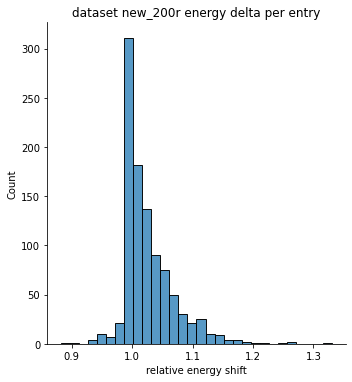

In [288]:

dataset_200r = [[-35.7, -33.2, -38.2, -40.7, -34.3, -42.99, -39.7, -34.2, -33.41, -30.2, -28.5, -41.6, -36.1, -31.3, -24.4, -25.4, -27.3, -46.5, -47.1, -39.7, -45.5, -36.5, -17.9, -33.2, -33.4, -23.2, -36.5, -32.7, -18.64, -29.0, -28.4, -51.9, -37.8, -29.44, -48.5, -33.9, -30.3, -26.6, -35.2, -28.8, -27.9, -30.4, -32.3, -23.34, -36.4, -33.4, -37.6, -8.6, -30.4, -40.4, -28.1, -36.1, -29.4, -38.2, -43.92, -23.92, -39.1, -36.6, -35.9, -29.82, -29.6, -36.1, -41.8, -38.8, -23.5, -38.1, -35.9, -25.34, -38.5, -37.3, -32.0, -35.5, -42.9, -16.9, -29.6, -40.1, -26.7, -36.5, -31.7, -40.4, -23.0, -39.3, -47.8, -28.5, -31.2, -35.6, -35.2, -38.8, -41.3, -34.4, -39.9, -34.2, -39.3, -27.34, -31.7, -40.0, -44.1, -37.4, -44.5, -42.07, -50.0, -49.5, -26.4, -35.9, -24.1, -39.8, -34.44, -28.5, -41.7, -26.6, -39.1, -29.4, -42.2, -27.17, -26.8, -18.5, -42.8, -27.1, -50.2, -23.7, -32.8, -38.9, -29.3, -25.3, -41.7, -37.8, -38.3, -31.6, -34.4, -31.6, -27.6, -39.8, -38.1, -40.1, -41.8, -29.7, -50.5, -26.4, -29.3, -36.4, -47.0, -40.8, -25.6, -33.4, -39.7, -21.2, -21.9, -46.6, -62.4, -29.9, -37.0, -35.3, -29.6, -27.7, -35.5, -27.3, -40.4, -31.2, -29.8, -18.33, -37.3, -21.7, -19.8, -25.7, -37.0, -41.9, -37.1, -36.8, -39.4, -33.3, -33.3, -32.7, -31.2, -31.7, -43.0, -23.52, -38.3, -43.0, -29.8, -25.4, -19.0, -29.02, -37.5, -35.8, -36.7, -38.8, -32.6, -34.7, -49.5, -23.3, -31.2, -27.1, -39.6, -44.7, -34.8, -36.1, -36.7, -44.6, -23.8, -33.9, -30.7, -45.8, -25.6, -35.1, -26.0, -38.6, -30.9, -44.5, -18.3, -40.0, -48.1, -27.3, -38.3, -40.2, -31.6, -27.0, -26.2, -20.5, -41.5, -38.2, -30.2, -32.4, -21.9, -32.5, -35.5, -39.6, -24.2, -27.7, -34.3, -30.9, -50.0, -32.6, -33.8, -38.1, -41.5, -42.5, -27.9, -31.8, -34.5, -37.3, -27.9, -31.6, -22.8, -34.3, -31.3, -33.3, -41.0, -31.2, -30.7, -25.2, -35.2, -42.8, -26.7, -31.9, -37.6, -34.3, -39.4, -30.4, -42.6, -15.8, -34.8, -19.3, -35.3, -25.3, -29.1, -26.2, -28.57, -40.2, -47.6, -33.5, -43.8, -31.2, -37.9, -38.3, -38.3, -22.1, -22.7, -46.0, -29.1, -29.3, -31.2, -12.1, -14.4, -31.5, -33.6, -34.4, -26.9, -30.2, -34.3, -42.2, -31.6, -37.97, -31.2, -34.0, -32.4, -46.0, -33.2, -32.2, -12.7, -33.0, -55.1, -27.5, -40.1, -31.8, -50.1, -21.0, -44.7, -34.8, -40.8, -32.9, -36.5, -34.3, -24.37, -29.0, -31.1, -20.2, -23.91, -36.9, -24.4, -47.5, -36.3, -38.8, -32.4, -44.6, -32.0, -42.1, -40.5, -39.3, -16.2, -29.3, -52.0, -43.2, -39.0, -28.0, -53.3, -28.8, -25.4, -31.6, -30.8, -35.2, -27.6, -38.6, -39.9, -42.1, -40.0, -32.3, -31.7, -42.6, -26.9, -41.3, -24.7, -20.3, -26.0, -33.2, -26.2, -42.6, -35.0, -23.4, -27.6, -36.3, -32.5, -36.2, -34.7, -31.0, -21.6, -41.8, -34.8, -42.2, -47.5, -30.1, -28.4, -36.8, -22.7, -26.0, -25.5, -34.7, -39.4, -33.9, -23.24, -35.5, -22.2, -30.3, -25.1, -17.3, -40.3, -26.4, -29.2, -44.4, -22.4, -40.1, -18.4, -20.9, -26.6, -39.5, -41.0, -35.3, -52.5, -28.1, -36.0, -19.6, -24.1, -41.5, -33.7, -29.1, -23.8, -47.6, -34.5, -21.9, -55.6, -30.4, -30.7, -36.5, -38.7, -32.1, -26.5, -29.5, -17.3, -29.9, -40.4, -30.3, -17.3, -29.3, -21.4, -39.4, -33.5, -33.0, -29.1, -35.5, -34.9, -34.7, -36.7, -38.6, -35.0, -38.3, -29.1, -32.5, -42.3, -32.8, -41.8, -29.3, -41.0, -37.2, -35.5, -35.7, -40.5, -26.0, -35.9, -29.3, -27.3, -37.1, -35.6, -22.7, -38.6, -22.8, -37.3, -28.5, -34.7, -33.4, -27.8, -32.0, -33.47, -39.1, -25.0, -35.0, -31.4, -24.5, -41.8, -18.2, -44.2, -31.5, -26.0, -39.9, -38.2, -32.1, -25.8, -30.91, -18.4, -32.7, -27.5, -41.5, -34.7, -21.3, -39.4, -35.2, -35.6, -40.6, -21.5, -41.4, -25.6, -39.8, -32.6, -33.2, -19.2, -30.5, -31.8, -52.3, -44.6, -32.8, -31.0, -26.2, -30.3, -26.7, -26.5, -36.9, -47.6, -39.2, -27.0, -35.8, -42.7, -36.4, -34.3, -24.4, -32.7, -39.4, -33.1, -28.0, -33.8, -27.3, -35.3, -30.2, -41.9, -24.0, -45.9, -34.4, -37.0, -43.2, -25.8, -29.6, -54.2, -22.6, -34.2, -41.5, -39.8, -40.7, -44.5, -26.8, -29.9, -40.3, -34.6, -39.7, -35.9, -35.4, -32.2, -36.8, -29.2, -40.2, -22.9, -50.5, -45.9, -40.3, -31.9, -35.4, -25.7, -35.5, -32.1, -32.0, -26.2, -34.1, -39.0, -35.97, -29.7, -37.5, -34.9, -32.4, -34.0, -42.7, -45.0, -47.8, -40.5, -30.6, -30.3, -34.6, -22.6, -30.8, -25.3, -44.1, -35.8, -36.5, -36.4, -26.7, -42.7, -35.7, -40.1, -26.8, -27.4, -32.0, -38.2, -37.6, -30.7, -39.5, -36.8, -37.2, -38.3, -53.5, -26.6, -24.3, -25.8, -21.0, -30.4, -34.7, -31.4, -32.5, -42.7, -38.4, -36.6, -38.8, -29.5, -15.7, -36.3, -39.6, -33.0, -21.1, -50.3, -36.7, -22.54, -35.6, -34.9, -33.5, -29.6, -37.8, -39.2, -38.7, -23.8, -35.9, -28.0, -28.7, -36.6, -21.2, -33.7, -21.9, -37.74, -33.1, -39.3, -24.7, -48.1, -32.4, -40.8, -40.2, -40.4, -33.8, -52.7, -36.6, -30.5, -45.7, -40.9, -32.2, -45.8, -37.8, -26.1, -33.4, -33.3, -30.6, -33.1, -37.5, -29.5, -39.2, -49.2, -25.7, -44.1, -46.1, -31.6, -32.7, -22.9, -30.94, -40.7, -19.3, -26.4, -36.1, -33.5, -24.6, -26.3, -18.9, -53.4, -30.8, -38.5, -39.4, -31.4, -19.5, -35.6, -35.5, -29.5, -40.4, -29.3, -31.3, -29.5, -46.2, -38.4, -30.9, -33.1, -27.1, -34.2, -20.2, -45.0, -35.2, -37.6, -26.9, -17.2, -39.1, -40.7, -26.5, -31.0, -41.2, -31.5, -26.0, -47.5, -24.7, -37.0, -42.3, -46.4, -31.6, -44.4, -30.2, -41.6, -32.5, -29.0, -30.6, -32.6, -33.6, -36.3, -40.8, -37.0, -42.5, -36.0, -25.8, -24.5, -32.27, -37.8, -26.4, -41.9, -32.1, -17.7, -24.5, -25.17, -31.9, -33.4, -25.4, -33.6, -26.1, -33.8, -36.4, -26.17, -35.5, -45.2, -41.1, -47.6, -32.6, -38.9, -31.8, -54.4, -36.6, -26.7, -20.8, -46.3, -32.3, -37.1, -37.2, -24.9, -31.4, -28.18, -31.5, -38.1, -32.1, -47.9, -35.9, -25.1, -39.2, -24.3, -37.8, -35.5, -51.8, -27.4, -46.4, -41.0, -43.2, -29.45, -39.8, -14.2, -31.2, -35.5, -31.8, -32.7, -48.0, -35.5, -24.1, -31.7, -32.6, -54.2, -40.7, -30.3, -39.0, -22.1, -23.8, -34.07, -10.8, -48.4, -24.7, -43.2, -32.2, -37.7, -26.4, -32.7, -39.7, -17.8, -32.1, -34.9, -34.2, -29.4, -30.5, -53.6, -41.5, -44.0, -23.3, -25.1, -35.0, -32.0, -32.7, -36.4, -28.7, -39.0, -39.6, -34.6, -28.6, -17.7, -38.2, -36.9, -33.2, -47.6, -45.7, -37.0, -36.0, -35.4, -32.9, -52.8, -46.9, -20.0, -44.4, -42.4, -26.8, -20.8, -30.5, -26.0, -27.29, -21.7, -32.3, -39.6, -26.87, -24.8, -37.5, -17.8, -26.8, -28.9, -43.2, -29.5, -35.5, -39.9, -48.7, -32.7, -31.8, -19.2, -51.3, -51.2, -26.8, -32.8, -31.1, -42.0, -26.24, -35.3, -29.7, -12.8, -33.0, -20.4, -25.39, -33.8, -23.1, -38.3, -30.3, -34.1, -39.27, -45.7, -33.6, -40.5, -33.4, -37.3, -46.9, -38.4, -36.0, -23.7, -26.1, -32.5, -28.4, -33.9, -31.5, -40.6, -52.6, -26.4, -33.4, -28.1, -31.37, -31.0, -38.0, -23.4, -21.7, -42.0, -32.2, -33.2, -33.4, -34.4, -29.2, -36.0, -39.4, -38.8, -31.2, -43.4, -37.7, -26.8, -34.4, -27.3, -36.6, -35.6, -29.7, -34.8, -39.9, -30.1, -34.9, -37.6, -42.3, -28.4, -27.6, -23.3, -33.3, -37.0, -32.3, -44.0, -29.7, -37.6, -35.9, -25.9, -29.2, -37.4, -33.9, -31.0, -32.5, -21.0, -39.0, -37.6, -33.6, -35.5, -26.3, -37.3, -28.3, -38.3, -25.7, -46.2, -20.2, -35.8, -20.2, -39.7, -29.3, -24.42, -47.1, -14.6, -51.1, -27.7, -25.8, -35.3, -28.8, -30.3, -25.5, -18.4, -43.9, -42.6, -41.3, -34.5, -33.0, -26.54, -36.37, -30.7, -26.7, -33.0, -31.5, -27.5, -16.99, -26.07, -28.3, -32.5, -34.7, -30.2, -43.0, -34.5, -20.4, -36.2, -46.2, -25.56, -45.0, -37.0, -41.4, -23.0, -41.5, -33.6, -25.2],
[-35.7, -32.0, -38.2, -39.6, -34.3, -44.0, -39.7, -31.1, -33.41, -30.2, -28.5, -40.4, -36.1, -32.2, -25.1, -24.5, -28.6, -46.5, -47.1, -39.7, -43.5, -35.59, -17.9, -33.2, -33.4, -22.9, -36.5, -30.9, -16.84, -27.5, -25.37, -50.4, -33.72, -29.44, -50.4, -35.6, -28.9, -26.5, -34.6, -27.5, -27.8, -30.3, -32.3, -21.0, -36.6, -31.2, -36.0, -8.5, -28.1, -39.8, -27.4, -36.6, -29.4, -37.7, -43.3, -23.0, -38.0, -33.9, -33.8, -29.6, -28.9, -36.1, -41.1, -38.1, -23.5, -34.5, -32.7, -25.34, -38.4, -36.3, -31.8, -34.4, -41.8, -12.7, -29.09, -39.5, -26.7, -35.5, -32.8, -39.4, -21.7, -37.4, -46.9, -28.1, -31.2, -35.4, -35.2, -38.8, -41.3, -33.9, -39.9, -31.6, -39.0, -27.34, -31.7, -39.1, -44.1, -37.4, -42.3, -42.5, -50.0, -48.4, -25.6, -33.99, -24.4, -39.8, -34.04, -28.2, -41.7, -25.0, -40.4, -28.9, -40.2, -27.5, -26.8, -17.8, -42.8, -27.1, -49.2, -23.3, -32.8, -35.7, -28.8, -25.3, -42.2, -37.7, -38.3, -31.3, -33.5, -29.4, -26.8, -39.8, -37.8, -40.1, -38.2, -29.5, -49.2, -25.9, -29.0, -35.7, -47.0, -40.4, -24.4, -33.2, -39.5, -20.02, -21.9, -42.67, -62.4, -29.9, -35.3, -34.8, -28.7, -27.6, -34.2, -27.3, -40.4, -26.9, -29.8, -17.5, -36.3, -19.1, -21.3, -25.7, -35.6, -38.7, -37.1, -35.4, -38.4, -32.1, -30.4, -32.7, -31.2, -32.8, -41.9, -23.52, -37.2, -42.7, -28.7, -25.0, -18.7, -29.02, -36.4, -34.6, -36.5, -38.7, -32.6, -33.8, -49.5, -20.9, -28.0, -27.1, -39.0, -44.7, -34.6, -33.8, -35.8, -44.3, -26.7, -33.9, -29.7, -43.4, -24.6, -30.5, -25.8, -37.6, -31.3, -44.3, -15.3, -38.9, -47.4, -27.3, -37.3, -40.2, -31.5, -26.3, -25.5, -19.8, -41.5, -38.2, -30.2, -30.5, -21.9, -28.9, -35.5, -39.5, -24.2, -26.7, -32.9, -28.6, -49.6, -31.0, -33.6, -35.1, -41.1, -42.5, -25.8, -31.8, -34.28, -37.3, -25.9, -31.5, -21.3, -35.8, -28.7, -29.0, -41.0, -31.0, -26.2, -24.1, -34.4, -42.1, -26.1, -31.8, -36.9, -34.3, -39.4, -30.4, -40.5, -15.8, -34.3, -18.6, -35.3, -25.3, -28.3, -23.9, -27.07, -39.1, -44.5, -33.5, -46.0, -29.3, -37.7, -38.3, -38.3, -20.3, -25.7, -46.0, -28.6, -28.0, -31.2, -12.1, -13.6, -35.7, -32.2, -32.8, -25.5, -30.4, -34.3, -40.7, -29.5, -37.27, -30.7, -33.1, -31.8, -45.8, -32.9, -32.2, -11.5, -32.2, -53.9, -26.1, -39.3, -31.8, -48.7, -21.1, -44.7, -34.5, -40.1, -32.0, -35.3, -34.3, -27.5, -28.5, -31.1, -17.6, -23.91, -35.5, -24.4, -47.5, -36.3, -38.8, -32.4, -44.6, -32.0, -42.2, -40.3, -39.3, -16.2, -29.3, -51.8, -42.1, -38.6, -27.5, -51.7, -28.8, -24.6, -31.6, -28.4, -35.2, -27.8, -36.4, -39.9, -38.18, -40.0, -32.3, -31.0, -41.8, -24.9, -40.5, -24.5, -20.3, -24.5, -31.4, -25.3, -41.5, -34.6, -22.7, -27.3, -35.5, -31.4, -37.2, -34.6, -30.5, -21.9, -40.5, -33.4, -42.2, -48.4, -28.4, -27.3, -35.51, -21.5, -26.0, -25.1, -32.8, -37.9, -34.0, -20.1, -33.5, -21.8, -30.3, -24.5, -17.3, -40.3, -26.4, -29.1, -44.1, -22.4, -41.4, -18.0, -20.9, -26.5, -39.1, -41.0, -35.3, -51.5, -28.1, -36.0, -19.6, -24.1, -41.3, -33.7, -28.8, -24.4, -46.8, -34.2, -21.3, -54.1, -30.4, -29.9, -35.4, -38.0, -34.6, -26.5, -25.8, -19.2, -28.2, -39.0, -30.3, -16.4, -29.3, -21.4, -37.3, -33.7, -29.5, -27.3, -33.8, -34.3, -34.7, -35.2, -37.1, -35.0, -38.3, -27.7, -32.5, -39.0, -32.7, -41.1, -28.3, -39.4, -35.6, -35.5, -35.7, -40.5, -27.2, -35.6, -28.2, -27.3, -36.0, -35.1, -20.4, -38.6, -22.8, -36.9, -27.5, -30.6, -33.4, -29.19, -31.8, -30.1, -38.5, -25.0, -34.9, -29.9, -24.2, -41.8, -18.2, -44.2, -31.5, -23.6, -38.5, -36.5, -30.9, -25.7, -26.81, -18.4, -32.7, -26.9, -41.5, -34.7, -20.0, -39.4, -34.4, -35.6, -39.8, -21.1, -41.4, -24.4, -37.1, -32.6, -30.8, -18.0, -30.2, -31.8, -51.9, -42.6, -32.4, -31.0, -25.5, -29.7, -26.3, -26.4, -36.9, -46.5, -38.1, -27.0, -35.0, -42.0, -36.4, -32.8, -24.4, -32.7, -39.4, -32.6, -30.0, -33.4, -26.2, -35.9, -28.7, -41.9, -21.5, -46.6, -34.4, -37.0, -42.2, -25.8, -26.28, -52.8, -22.6, -33.6, -41.5, -40.3, -40.2, -43.0, -26.8, -29.9, -38.3, -31.2, -39.7, -34.8, -35.4, -30.6, -36.8, -28.9, -40.3, -22.5, -48.7, -45.9, -39.2, -29.5, -34.0, -26.2, -35.2, -32.1, -31.3, -26.2, -34.1, -39.0, -34.97, -29.1, -36.8, -33.5, -32.4, -34.0, -42.6, -45.0, -46.9, -39.6, -28.4, -30.1, -33.9, -22.2, -30.3, -25.3, -40.7, -35.8, -37.8, -35.1, -26.7, -42.2, -35.6, -38.3, -23.7, -26.9, -32.0, -37.2, -36.9, -30.4, -34.8, -35.6, -37.2, -38.3, -54.2, -27.1, -23.3, -24.1, -20.3, -30.4, -32.4, -28.2, -30.0, -42.1, -37.3, -36.4, -37.5, -29.5, -15.7, -34.4, -36.6, -32.7, -21.1, -49.1, -36.7, -22.14, -34.8, -34.3, -33.5, -29.6, -38.6, -39.2, -35.4, -22.7, -34.5, -26.4, -25.7, -36.1, -20.9, -33.7, -21.4, -36.74, -32.9, -39.0, -24.7, -48.0, -29.4, -36.9, -41.3, -37.9, -32.8, -52.5, -36.2, -29.5, -45.7, -40.9, -32.2, -41.5, -37.5, -26.1, -33.2, -34.0, -30.0, -31.6, -36.7, -29.5, -39.2, -49.2, -24.9, -42.5, -43.8, -31.6, -32.7, -22.4, -28.84, -40.7, -18.1, -22.8, -35.2, -32.3, -25.1, -24.0, -18.9, -53.8, -30.2, -38.0, -35.3, -31.4, -18.7, -35.2, -35.5, -27.8, -39.9, -25.1, -31.3, -29.5, -45.6, -37.9, -27.7, -32.8, -27.0, -34.2, -19.5, -45.0, -33.3, -37.6, -24.9, -16.1, -37.9, -40.4, -26.1, -30.7, -39.2, -31.5, -26.0, -47.5, -24.2, -35.7, -39.7, -46.4, -31.1, -44.4, -30.2, -41.6, -32.0, -29.0, -29.3, -32.3, -33.6, -35.1, -39.8, -37.0, -42.5, -34.4, -24.9, -23.4, -32.4, -39.5, -25.1, -41.9, -27.9, -17.0, -23.3, -24.57, -32.6, -30.8, -25.4, -33.1, -25.9, -30.51, -36.4, -26.17, -35.1, -44.8, -41.1, -46.7, -30.57, -38.5, -31.8, -54.4, -34.6, -23.5, -19.8, -45.4, -29.9, -35.9, -36.9, -24.9, -30.4, -30.3, -30.6, -34.5, -30.4, -49.2, -35.3, -24.2, -38.68, -22.8, -37.8, -35.9, -49.5, -24.6, -44.0, -40.35, -43.2, -28.83, -39.8, -14.2, -31.2, -35.47, -31.8, -32.4, -47.5, -31.97, -24.1, -31.7, -31.4, -52.9, -40.4, -27.9, -37.6, -22.0, -23.8, -32.3, -10.4, -45.4, -24.4, -40.9, -31.7, -36.5, -26.4, -32.7, -36.8, -17.1, -30.9, -32.8, -34.2, -27.4, -28.6, -53.9, -40.9, -41.7, -22.7, -24.9, -34.0, -31.4, -32.7, -36.4, -28.4, -39.0, -39.1, -32.9, -27.8, -18.5, -38.2, -35.7, -30.9, -47.3, -43.9, -37.0, -35.1, -34.9, -32.9, -52.8, -45.4, -19.08, -40.5, -40.7, -26.3, -20.8, -30.5, -25.3, -26.9, -21.7, -32.3, -38.4, -26.87, -23.6, -37.5, -15.0, -26.1, -28.1, -39.94, -29.21, -35.3, -39.8, -47.7, -32.7, -29.9, -19.2, -47.84, -51.2, -25.3, -32.3, -30.7, -41.2, -25.3, -34.2, -29.7, -12.2, -33.0, -21.2, -24.2, -33.8, -22.6, -38.6, -28.2, -31.1, -39.27, -45.7, -33.3, -40.2, -31.2, -35.7, -45.6, -38.4, -33.9, -23.1, -25.0, -32.5, -28.4, -33.9, -29.9, -40.6, -51.6, -25.82, -33.0, -26.3, -31.37, -30.6, -38.0, -26.8, -20.6, -38.3, -31.9, -31.7, -33.3, -31.7, -28.3, -34.9, -38.8, -36.7, -30.5, -39.9, -34.3, -26.8, -32.9, -27.3, -36.7, -35.3, -29.5, -33.1, -39.9, -30.1, -34.9, -37.5, -42.3, -28.4, -27.6, -23.4, -30.4, -37.0, -32.0, -43.8, -29.7, -37.2, -34.7, -25.9, -29.0, -37.2, -32.7, -31.0, -31.3, -20.6, -37.7, -37.6, -33.2, -31.4, -26.3, -35.9, -26.1, -38.3, -25.7, -46.2, -18.6, -35.6, -20.2, -37.5, -28.1, -24.5, -45.7, -15.1, -51.1, -30.6, -24.1, -35.0, -28.6, -26.84, -25.5, -18.4, -43.8, -42.1, -41.1, -34.6, -31.9, -26.2, -35.5, -30.7, -26.7, -33.0, -29.8, -27.2, -15.25, -25.87, -28.3, -32.3, -28.64, -30.2, -43.9, -34.5, -19.2, -36.2, -45.7, -25.36, -45.0, -37.0, -38.7, -23.0, -38.8, -32.8, -26.5],
[-35.7, -32.0, -38.2, -40.7, -34.3, -44.0, -38.8, -31.1, -33.41, -30.2, -28.5, -40.4, -36.1, -31.3, -25.1, -23.8, -26.6, -46.5, -47.1, -39.7, -43.5, -35.59, -17.9, -33.2, -31.4, -22.9, -36.5, -30.9, -16.84, -27.5, -25.37, -50.4, -33.92, -29.44, -45.3, -35.6, -28.9, -26.5, -35.6, -28.9, -27.8, -30.3, -32.3, -20.0, -38.4, -32.74, -37.6, -8.5, -28.1, -39.2, -25.5, -36.6, -29.4, -37.8, -43.92, -23.0, -38.0, -36.6, -33.8, -29.82, -28.9, -36.1, -41.1, -38.1, -23.5, -34.1, -32.7, -25.34, -38.4, -36.3, -31.8, -33.0, -39.44, -12.7, -29.6, -38.6, -26.7, -35.5, -32.8, -39.4, -21.7, -37.4, -46.9, -28.1, -31.2, -34.4, -35.0, -38.8, -41.3, -33.9, -39.9, -31.6, -39.0, -27.34, -31.0, -39.1, -43.1, -37.4, -43.9, -42.5, -50.0, -48.4, -26.4, -33.99, -24.4, -39.8, -34.04, -24.9, -41.7, -25.0, -39.1, -28.9, -40.2, -28.0, -26.8, -17.8, -42.8, -27.1, -49.2, -23.7, -32.47, -35.7, -29.9, -25.3, -42.2, -37.7, -38.3, -31.3, -33.5, -29.4, -26.8, -39.8, -37.5, -40.1, -39.1, -29.5, -49.2, -25.1, -29.0, -35.7, -47.0, -40.4, -24.4, -33.2, -38.5, -19.92, -21.8, -46.6, -62.4, -29.9, -35.3, -34.8, -28.8, -27.6, -34.2, -27.3, -40.4, -28.1, -29.8, -17.5, -35.2, -17.4, -19.5, -25.7, -35.5, -38.7, -37.1, -35.4, -39.4, -31.8, -30.3, -32.2, -31.2, -32.8, -40.4, -23.52, -38.1, -42.7, -26.0, -23.1, -18.7, -29.0, -36.4, -36.8, -36.5, -36.8, -32.6, -33.8, -49.5, -24.7, -28.0, -27.1, -37.9, -44.7, -34.6, -33.8, -35.2, -44.3, -24.27, -33.9, -29.7, -43.4, -24.6, -34.0, -26.0, -37.6, -30.7, -44.3, -15.3, -38.9, -47.4, -26.2, -38.0, -35.8, -31.5, -26.3, -25.5, -19.8, -41.5, -38.2, -30.2, -30.5, -21.9, -29.8, -35.5, -39.5, -23.8, -26.7, -34.0, -28.5, -49.6, -31.0, -32.8, -35.1, -41.1, -40.2, -27.2, -31.8, -30.6, -36.1, -25.9, -31.5, -21.3, -34.7, -28.7, -29.0, -41.0, -31.0, -24.4, -25.0, -32.7, -42.1, -26.1, -31.8, -36.9, -34.3, -39.4, -29.7, -40.5, -15.8, -34.3, -18.6, -34.4, -25.3, -28.3, -24.8, -27.07, -37.8, -44.5, -33.5, -43.9, -29.3, -37.7, -38.3, -38.3, -20.3, -22.0, -45.3, -32.0, -28.0, -31.2, -12.1, -13.6, -35.7, -32.2, -33.3, -25.5, -30.2, -34.3, -40.7, -29.5, -37.0, -30.7, -33.1, -29.8, -45.8, -32.9, -32.2, -12.6, -32.2, -53.9, -26.1, -39.3, -31.8, -50.8, -21.1, -44.7, -34.5, -40.1, -28.9, -35.3, -34.3, -22.0, -27.87, -31.1, -17.6, -23.91, -36.4, -24.4, -47.5, -36.3, -38.8, -32.4, -44.6, -32.0, -42.2, -40.3, -39.3, -16.2, -29.3, -51.8, -42.1, -38.6, -28.1, -51.7, -28.8, -24.6, -31.5, -28.4, -35.2, -27.6, -36.4, -39.4, -37.84, -41.0, -34.1, -31.0, -44.7, -24.9, -40.3, -24.5, -20.3, -23.4, -31.8, -25.3, -41.5, -34.6, -22.7, -27.0, -36.0, -28.7, -37.2, -34.6, -30.5, -21.9, -39.3, -33.4, -42.2, -46.8, -27.4, -27.3, -35.51, -22.1, -23.7, -25.1, -33.47, -37.2, -34.0, -20.1, -33.5, -21.8, -25.21, -24.0, -17.3, -40.3, -26.1, -29.1, -44.1, -22.4, -40.1, -18.0, -20.9, -26.5, -39.5, -40.0, -35.3, -51.5, -28.1, -36.0, -19.6, -23.4, -41.3, -33.7, -28.8, -23.8, -46.8, -34.2, -21.3, -56.3, -30.4, -29.9, -35.4, -38.0, -34.6, -26.5, -25.8, -15.7, -27.9, -40.4, -31.5, -16.4, -29.2, -21.4, -37.3, -33.5, -29.5, -27.3, -32.5, -34.3, -34.54, -35.2, -38.6, -32.8, -38.3, -27.7, -32.5, -39.0, -32.8, -41.1, -28.3, -38.5, -36.3, -35.5, -35.7, -39.5, -27.2, -35.7, -28.2, -27.2, -35.1, -35.1, -20.4, -38.6, -22.8, -36.9, -27.5, -30.6, -33.4, -27.8, -31.8, -30.1, -38.5, -23.3, -34.9, -28.9, -24.2, -41.8, -18.2, -44.2, -31.5, -24.8, -38.4, -36.5, -30.7, -25.8, -26.81, -17.6, -32.7, -26.9, -41.5, -34.7, -22.3, -39.4, -34.4, -35.6, -39.8, -21.3, -41.4, -25.0, -37.1, -32.6, -30.8, -18.0, -30.2, -31.2, -50.7, -42.6, -31.5, -31.0, -25.5, -29.7, -26.3, -26.4, -36.9, -44.4, -38.5, -27.0, -34.0, -42.7, -36.4, -34.7, -24.4, -31.3, -37.2, -31.4, -30.0, -33.4, -26.2, -36.1, -28.7, -41.9, -21.6, -45.9, -34.4, -35.2, -42.5, -25.8, -26.28, -54.2, -22.6, -33.6, -41.5, -39.7, -40.2, -43.0, -25.6, -29.9, -38.3, -30.8, -39.7, -34.8, -35.4, -30.5, -36.5, -28.9, -39.9, -22.9, -48.7, -45.9, -39.2, -31.2, -32.4, -25.7, -35.2, -32.8, -31.3, -26.8, -34.1, -39.0, -34.97, -29.1, -36.8, -33.5, -32.4, -31.0, -42.7, -45.0, -45.1, -39.6, -28.4, -30.1, -34.6, -22.8, -30.1, -25.3, -42.3, -34.2, -36.0, -35.1, -25.8, -42.2, -35.6, -39.9, -23.7, -26.9, -29.58, -37.2, -36.9, -30.4, -34.8, -35.6, -37.2, -37.9, -53.8, -26.0, -23.3, -24.1, -19.5, -30.4, -32.4, -26.3, -30.45, -41.1, -37.3, -36.4, -37.5, -31.7, -15.7, -34.4, -36.6, -32.5, -21.1, -49.1, -36.7, -22.14, -34.8, -34.3, -32.3, -29.6, -38.6, -39.2, -35.7, -23.8, -34.5, -26.4, -25.7, -35.6, -20.5, -33.7, -21.4, -36.74, -32.9, -31.09, -24.7, -47.9, -31.77, -36.9, -41.3, -37.9, -32.8, -52.5, -36.2, -28.3, -45.7, -40.9, -32.1, -41.5, -37.5, -26.1, -33.2, -34.2, -30.6, -31.6, -36.7, -29.5, -41.4, -49.2, -24.9, -42.5, -45.9, -28.8, -32.7, -22.4, -28.84, -40.7, -18.1, -24.8, -35.2, -32.3, -25.1, -24.0, -18.9, -53.1, -29.1, -38.0, -39.4, -31.4, -18.7, -34.2, -35.5, -27.8, -40.4, -25.1, -31.3, -29.5, -45.6, -37.9, -27.7, -32.8, -27.0, -34.2, -19.6, -45.0, -33.3, -37.6, -24.9, -15.7, -37.9, -39.9, -26.1, -30.7, -42.0, -31.5, -26.0, -47.5, -21.7, -35.7, -39.7, -46.4, -31.3, -44.3, -30.2, -41.6, -30.2, -29.0, -29.5, -32.3, -33.6, -35.1, -39.8, -37.0, -42.5, -32.3, -24.9, -23.4, -31.5, -37.3, -25.1, -41.9, -27.9, -17.0, -23.1, -24.57, -31.9, -32.9, -25.4, -31.4, -25.9, -30.4, -36.1, -26.17, -35.1, -44.8, -41.1, -46.7, -30.57, -38.5, -31.8, -54.4, -34.6, -23.6, -19.8, -45.9, -30.5, -36.0, -36.9, -24.9, -30.4, -30.3, -30.6, -36.7, -30.4, -49.2, -35.3, -23.7, -39.2, -22.8, -36.4, -35.9, -49.5, -24.6, -44.0, -39.2, -43.2, -28.83, -39.8, -14.2, -31.2, -34.0, -31.8, -32.4, -47.5, -31.97, -25.4, -31.7, -32.2, -52.9, -40.4, -29.7, -39.0, -22.0, -23.8, -32.3, -11.2, -45.2, -24.4, -40.9, -31.7, -36.5, -26.4, -32.7, -36.8, -17.1, -32.1, -32.0, -34.2, -29.9, -30.5, -53.9, -40.9, -39.4, -22.7, -24.9, -35.0, -31.0, -32.6, -34.2, -25.9, -39.0, -39.1, -34.8, -27.8, -16.9, -38.2, -35.7, -30.9, -47.6, -43.3, -37.0, -35.1, -34.9, -32.9, -52.8, -45.4, -19.08, -40.5, -40.3, -23.1, -20.8, -30.5, -25.3, -25.99, -21.7, -32.3, -39.6, -26.57, -24.8, -37.5, -16.3, -26.8, -28.1, -39.94, -29.21, -35.3, -39.8, -48.7, -32.7, -29.7, -19.2, -48.34, -51.2, -25.3, -32.3, -30.7, -41.2, -25.0, -34.2, -29.7, -12.2, -33.0, -21.2, -24.2, -33.2, -21.5, -38.6, -30.0, -29.9, -38.8, -45.7, -30.19, -40.7, -31.6, -35.7, -45.6, -38.1, -32.2, -23.1, -25.6, -32.5, -28.4, -33.9, -29.9, -40.6, -52.6, -25.82, -32.2, -26.3, -31.37, -29.7, -38.0, -24.5, -19.5, -38.2, -32.2, -31.7, -33.3, -31.7, -28.3, -34.0, -38.8, -37.7, -30.5, -39.9, -34.3, -26.8, -32.9, -27.3, -35.0, -35.3, -29.5, -33.1, -39.6, -30.1, -34.9, -37.5, -42.3, -28.4, -27.0, -23.3, -29.31, -37.0, -32.0, -43.8, -29.7, -37.2, -34.7, -25.9, -29.0, -37.2, -31.7, -30.7, -31.3, -21.0, -37.7, -37.2, -33.2, -30.3, -26.3, -35.5, -25.7, -38.3, -25.7, -46.2, -18.6, -35.6, -20.2, -37.3, -28.1, -24.5, -46.1, -15.1, -49.9, -27.5, -23.12, -35.3, -28.6, -25.9, -25.5, -18.4, -43.3, -41.78, -41.1, -34.9, -32.9, -26.2, -35.5, -30.7, -26.7, -33.0, -30.1, -27.2, -14.59, -25.87, -28.3, -32.3, -28.64, -30.2, -43.9, -34.5, -19.2, -36.1, -46.8, -25.36, -45.0, -37.0, -38.7, -23.0, -38.8, -32.8, -25.2]]
print_avg(dataset_200r)

dataset_300r = [[-71.1, -53.3, -57.7, -71.0, -71.8, -53.6, -54.4, -65.3, -58.4, -62.6, -61.4, -42.2, -61.4, -46.9, -50.5, -64.2, -60.0, -57.17, -62.7, -59.8, -60.7, -76.2, -71.7, -52.3, -55.5, -63.1, -66.3, -57.8, -66.3, -49.3, -73.6, -52.0, -50.7, -43.5, -56.7, -72.6, -41.94, -67.9, -60.3, -54.7, -52.0, -77.1, -54.2, -36.3, -47.5, -47.5, -58.1, -69.6, -59.5, -58.6, -61.6, -62.1, -58.5, -57.77, -55.1, -54.41, -58.8, -50.8, -53.6, -69.8, -80.0, -48.5, -62.8, -57.8, -36.5, -58.2, -42.9, -43.4, -79.6, -62.5, -73.5, -58.5, -71.0, -63.5, -51.6, -61.1, -64.2, -72.1, -59.4, -56.2, -72.6, -76.9, -53.7, -57.4, -47.0, -54.4, -63.4, -57.9, -58.4, -63.62, -72.8, -46.1, -56.7, -56.8, -65.0, -58.4, -79.2, -67.6, -46.5, -71.5, -51.3, -50.8, -56.4, -73.3, -62.5, -67.2, -58.2, -55.7, -48.97, -59.6, -63.9, -64.2, -43.1, -71.39, -51.8, -54.1, -33.2, -46.1, -54.7, -55.4, -70.8, -69.6, -38.4, -54.7, -47.9, -66.5, -58.5, -44.8, -48.7, -42.3, -59.0, -68.4, -58.5, -78.3, -52.3, -60.1, -52.2, -75.9, -56.6, -65.4, -54.27, -77.7, -64.5, -48.64, -54.6, -47.6, -68.6, -64.6, -71.18, -48.7, -43.9, -56.6, -63.8, -68.1, -76.8, -47.9, -55.9, -53.2, -56.9, -63.8, -35.6, -47.7, -55.2, -61.6, -28.3, -61.1, -68.9, -53.44, -61.6, -50.8, -63.1, -52.9, -41.5, -45.3, -74.5, -70.1, -55.2, -73.5, -60.6, -41.0, -65.4, -78.6, -71.9, -66.0, -62.2, -69.0, -68.7, -67.2, -75.0, -66.3, -49.4, -60.6, -55.5, -54.6, -57.2, -64.2, -64.0, -39.0, -49.6, -48.4, -51.4, -70.3, -84.7, -43.4, -70.3, -72.1, -60.6, -68.3, -67.1, -75.8, -58.4, -57.9, -53.9, -57.8, -72.6, -66.1, -63.87, -78.4, -48.7, -56.9, -84.0, -44.7, -54.3, -73.9, -64.9, -63.3, -66.6, -72.8, -52.0, -56.7, -61.7, -58.0, -60.4, -51.24, -63.6, -53.2, -54.0, -47.4, -67.2, -50.3, -50.22, -60.8, -56.2, -46.4, -48.0, -60.1, -64.5, -59.8, -63.5, -35.27, -51.8, -63.4, -58.4, -52.4, -59.0, -35.6, -58.9, -48.4, -62.8, -61.94, -73.9, -45.2, -57.3, -83.8, -76.9, -60.2, -66.7, -68.07, -61.9, -69.7, -54.7, -73.3, -59.1, -64.4, -58.1, -56.88, -59.8, -52.0, -60.5, -57.7, -54.6, -48.4, -60.9, -49.17, -57.7, -68.4, -42.85, -65.6, -49.9, -72.1, -63.1, -54.3, -73.2, -59.64, -56.9, -45.0, -65.4, -72.5, -48.3, -65.7, -66.5, -56.8, -63.6, -66.2, -61.4, -52.7, -75.5, -70.0, -56.0, -51.8, -39.1, -53.3, -45.7, -78.2, -47.4, -53.9, -70.1, -45.6, -59.1, -58.8, -68.6, -64.2, -51.6, -58.9, -49.64, -68.8, -62.5, -44.7, -65.1, -62.7, -58.1, -56.1, -60.9, -51.6, -43.7, -70.3, -57.9, -70.4, -62.3, -65.2, -69.3, -44.8, -63.6, -60.3, -65.7, -47.6, -55.9, -69.5, -64.24, -55.9, -84.5, -61.0, -73.9, -55.2, -65.6, -67.0, -66.7, -58.0, -54.6, -61.9, -58.8, -53.7, -75.0, -50.1, -63.1, -35.5, -47.7, -51.6, -54.55, -55.1, -55.9, -54.1, -72.4, -76.3, -66.2, -57.9, -59.9, -60.9, -64.5, -69.4, -52.2, -60.8, -55.57, -59.9, -68.8, -68.7, -58.8, -64.1, -82.8, -48.47, -67.8, -51.3, -35.19, -61.0, -51.8, -70.6, -59.9, -70.9, -59.3, -64.6, -80.4, -65.8, -66.0, -43.71, -52.6, -73.0, -83.6, -52.9, -53.2, -31.68, -65.6, -61.3, -68.8, -61.3, -71.4, -70.3, -55.2, -74.7, -66.38, -76.0, -86.7, -69.88, -57.2, -55.5, -65.2, -50.8, -51.0, -56.8, -69.2, -81.3, -55.8, -63.9, -74.3, -57.2, -68.4, -58.7, -60.3, -68.0, -41.9, -63.2, -69.9, -59.0, -76.0, -82.5, -58.9, -50.7, -60.2, -54.6, -66.8, -54.9, -35.1, -83.2, -79.3, -54.5, -66.1, -68.5, -71.8, -52.5, -52.88, -68.9, -65.8, -56.7, -83.0, -61.8, -58.8, -67.8, -69.2, -66.5, -63.6, -60.4, -68.7, -52.4, -62.4, -52.9, -62.3, -68.7, -60.5, -57.0, -72.5, -57.3, -78.6, -44.1, -55.4, -50.0, -73.2, -53.4, -68.7, -49.5, -66.3, -75.6, -56.9, -64.8, -65.0, -54.0, -66.2, -59.8, -49.8, -60.1, -53.9, -48.3, -53.5, -66.6, -62.8, -70.6, -57.34, -52.6, -62.5, -43.3, -46.6, -46.4, -57.9, -49.6, -61.2, -69.2, -60.3, -60.3, -56.0, -55.7, -44.9, -48.7, -51.1, -61.5, -49.5, -65.4, -45.2, -51.3, -57.4, -63.1, -56.9, -64.5, -54.6, -54.94, -53.1, -68.99, -65.4, -61.1, -68.3, -46.4, -57.4, -78.0, -65.7, -61.5, -76.2, -62.2, -53.6, -60.2, -65.1, -64.7, -64.5, -73.4, -70.65, -51.2, -53.8, -75.4, -63.4, -53.4, -66.9, -44.0, -78.0, -72.1, -72.7, -60.2, -77.1, -61.3, -63.9, -46.6, -41.3, -54.2, -67.3, -55.6, -57.6, -46.9, -41.99, -49.6, -58.8, -68.2, -47.5, -55.9, -83.3, -65.0, -70.0, -64.3, -66.7, -39.2, -57.3, -47.65, -48.9, -43.9, -45.5, -59.6, -55.5, -65.8, -63.6, -69.3, -54.4, -47.6, -71.3, -80.2, -42.4, -63.1, -55.94, -48.8, -51.3, -52.7, -62.0, -44.3, -65.7, -74.0, -70.6, -79.7, -68.7, -45.3, -59.72, -50.4, -54.4, -61.7, -53.8, -61.3, -39.4, -60.1, -70.6, -76.1, -75.8, -50.5, -64.0, -54.2, -59.3, -68.5, -54.39, -58.9, -29.9, -62.7, -69.6, -60.8, -67.2, -70.2, -60.57, -62.3, -63.8, -55.4, -65.2, -65.2, -41.2, -64.5, -51.27, -52.4, -50.6, -63.3, -40.8, -53.6, -67.5, -53.7, -57.4, -61.0, -38.92, -67.8, -65.2, -46.1, -60.4, -53.3, -50.6, -62.1, -78.4, -69.7, -64.3, -48.5, -65.6, -50.17, -47.3, -93.9, -78.6, -49.9, -56.0, -62.8, -58.6, -47.6, -45.0, -70.2, -63.6, -53.3, -34.9, -56.52, -56.2, -77.0, -48.1, -76.6, -57.5, -68.8, -54.3, -40.4, -47.12, -54.7, -76.4, -60.4, -46.1, -75.2, -45.4, -64.0, -81.5, -41.7, -66.2, -56.3, -47.9, -43.91, -58.1, -73.4, -44.9, -83.0, -65.0, -57.1, -43.8, -56.1, -64.6, -74.0, -45.1, -54.9, -88.9, -51.8, -54.6, -60.2, -58.0, -57.9, -48.54, -67.1, -46.7, -50.54, -63.4, -53.0, -60.2, -46.1, -48.1, -68.9, -77.7, -63.5, -59.2, -65.6, -60.3, -57.5, -47.4, -66.7, -46.3, -70.9, -47.0, -62.0, -58.14, -35.07, -69.3, -59.6, -52.7, -65.8, -54.7, -49.5, -60.5, -60.0, -62.37, -67.7, -41.67, -67.3, -64.4, -54.77, -56.3, -71.8, -74.2, -70.2, -76.8, -60.1, -57.77, -61.84, -74.8, -47.75, -58.9, -56.3, -78.4, -51.4, -61.5, -39.0, -60.3, -45.45, -58.2, -61.7, -55.9, -69.7, -50.0, -61.0, -53.3, -66.0, -47.6, -73.6, -57.0, -56.7, -78.9, -48.82, -52.87, -52.1, -61.2, -67.7, -72.5, -69.6, -71.1, -81.5, -46.9, -49.1, -71.3, -62.2, -76.6, -64.9, -68.5, -53.9, -58.4, -56.7, -70.0, -64.8, -70.0, -48.64, -52.4, -51.1, -37.77, -78.8, -52.2, -52.7, -72.1, -47.6, -71.8, -74.8, -38.7, -49.1, -69.1, -69.1, -44.5, -52.9, -64.2, -55.9, -45.9, -51.4, -66.0, -63.9, -40.1, -50.1, -60.7, -40.6, -51.4, -64.0, -57.6, -59.2, -63.88, -50.0, -68.7, -80.2, -58.39, -66.0, -53.6, -51.1, -78.8, -55.5, -44.14, -49.8, -54.8, -74.3, -57.82, -38.0, -76.1, -62.7, -67.0, -44.0, -60.8, -48.1, -61.9, -62.6, -49.1, -64.6, -72.6, -58.1, -49.1, -50.4, -48.4, -78.5, -61.6, -66.1, -54.9, -50.3, -65.2, -64.7, -51.9, -61.7, -60.8, -48.24, -72.7, -57.9, -41.6, -72.8, -71.6, -80.0, -66.39, -77.8, -66.6, -76.2, -43.4, -73.4, -62.7, -62.7, -45.8, -80.7, -69.5, -62.5, -50.2, -62.1, -69.3, -53.2, -66.5, -57.7, -74.1, -74.1, -58.8, -68.6, -57.1, -62.1, -71.9, -78.0, -59.7, -75.1, -63.2, -66.4, -74.4, -52.1, -60.7, -66.4, -65.6, -57.5, -51.8, -54.9, -68.63, -54.9, -57.3, -46.7, -57.7, -59.1, -70.7, -50.9, -63.3, -63.5, -77.0, -76.4, -57.3, -72.6, -58.5, -55.2, -62.5, -64.8, -51.4, -50.4, -46.3, -44.6, -63.8, -49.4, -58.9, -55.9, -50.3, -48.4, -47.8, -70.8, -44.7, -48.2, -76.3, -71.0, -48.7, -47.49, -65.1, -67.9, -63.3, -61.1, -59.0, -45.5, -55.5, -74.8, -62.6, -61.1, -44.8, -56.0, -44.88, -70.2, -58.2, -60.6, -60.8, -28.7, -75.5, -54.5, -84.9, -66.5, -57.2, -96.7, -62.6, -61.3, -51.6, -47.4, -59.2, -56.8, -50.5, -75.0, -95.0, -63.8],
[-69.1, -52.4, -56.92, -70.8, -69.2, -46.2, -49.48, -65.3, -58.2, -62.6, -58.3, -38.3, -59.3, -47.6, -46.62, -59.8, -58.0, -56.6, -62.7, -58.7, -56.8, -75.8, -70.8, -52.3, -65.1, -63.1, -64.3, -55.1, -58.2, -47.2, -73.2, -50.7, -49.1, -42.4, -56.1, -70.7, -37.15, -65.1, -60.3, -52.9, -49.8, -75.4, -51.17, -33.54, -44.7, -44.4, -60.1, -66.4, -59.5, -58.4, -61.6, -59.4, -57.1, -56.97, -49.64, -52.41, -55.4, -45.75, -52.44, -69.6, -78.1, -46.4, -63.3, -57.7, -34.9, -57.4, -42.8, -40.9, -77.0, -61.5, -70.9, -58.0, -66.9, -63.5, -50.7, -58.4, -64.6, -71.6, -60.1, -55.8, -70.9, -75.9, -53.2, -51.0, -46.8, -55.7, -63.4, -59.3, -58.4, -60.9, -70.5, -46.1, -54.8, -54.7, -62.7, -58.4, -79.0, -64.2, -44.5, -71.3, -47.2, -49.2, -56.4, -72.1, -65.8, -67.2, -56.5, -55.3, -47.2, -58.2, -63.9, -61.6, -42.8, -63.9, -47.3, -54.1, -34.2, -41.5, -54.7, -55.4, -69.7, -67.9, -38.4, -54.7, -49.5, -67.3, -58.5, -44.2, -47.6, -42.3, -55.8, -64.9, -57.7, -76.5, -52.3, -59.6, -53.3, -74.8, -55.6, -64.9, -52.5, -75.6, -64.5, -48.64, -47.8, -46.9, -68.6, -63.7, -69.9, -50.4, -44.6, -53.7, -63.4, -64.0, -76.5, -46.9, -54.5, -50.5, -53.3, -62.9, -31.9, -45.3, -54.9, -62.8, -25.2, -59.5, -67.7, -48.0, -57.9, -50.8, -62.6, -50.21, -41.0, -45.3, -71.3, -69.7, -54.8, -70.4, -59.4, -39.3, -65.2, -78.5, -69.6, -64.5, -60.0, -67.3, -68.7, -66.7, -73.14, -64.5, -50.1, -59.6, -57.1, -52.8, -59.8, -63.81, -61.2, -37.2, -50.6, -48.7, -49.14, -70.5, -84.7, -39.7, -68.5, -71.0, -54.3, -68.1, -66.2, -75.5, -59.8, -56.7, -57.5, -59.0, -71.7, -64.0, -62.37, -78.0, -47.0, -55.4, -81.0, -41.4, -54.2, -71.8, -64.7, -62.9, -65.3, -70.7, -51.7, -56.2, -61.7, -54.6, -60.59, -51.1, -60.8, -53.0, -52.0, -47.4, -67.2, -47.7, -50.22, -58.0, -54.6, -45.5, -45.92, -60.1, -62.6, -58.7, -63.5, -32.87, -51.2, -62.6, -58.3, -52.1, -61.5, -35.3, -58.2, -48.4, -62.7, -64.67, -69.6, -45.2, -57.3, -83.8, -76.7, -60.2, -65.2, -65.17, -58.2, -71.0, -54.7, -70.4, -57.9, -63.0, -58.1, -56.88, -56.4, -50.8, -60.5, -57.7, -51.4, -48.9, -60.9, -49.8, -57.7, -70.0, -42.85, -63.0, -52.8, -70.2, -65.1, -56.7, -70.7, -57.44, -56.9, -43.0, -65.4, -72.5, -47.7, -60.4, -62.6, -54.5, -61.6, -65.9, -60.5, -50.4, -73.7, -65.5, -52.8, -51.0, -38.7, -51.7, -45.7, -67.4, -47.4, -55.9, -68.7, -43.4, -56.8, -58.0, -67.1, -66.1, -45.8, -60.84, -45.0, -63.7, -61.3, -44.3, -63.5, -60.7, -56.2, -56.1, -59.8, -51.5, -43.7, -70.3, -56.6, -70.3, -62.3, -64.0, -69.0, -43.2, -63.3, -55.2, -65.2, -47.6, -55.5, -68.1, -60.6, -54.0, -83.4, -61.0, -70.3, -54.0, -63.9, -61.1, -63.2, -57.0, -50.3, -61.5, -58.8, -52.1, -75.2, -48.1, -62.07, -35.5, -47.5, -43.52, -52.1, -53.8, -53.8, -51.2, -71.5, -76.3, -65.6, -57.0, -59.8, -54.3, -60.5, -66.3, -48.9, -60.8, -54.8, -56.0, -59.7, -68.7, -58.4, -61.64, -82.8, -38.3, -64.6, -50.4, -34.29, -60.3, -45.4, -69.1, -61.3, -68.8, -55.4, -62.3, -79.2, -64.5, -66.0, -43.71, -52.6, -71.6, -80.1, -50.6, -50.5, -31.68, -64.4, -61.3, -67.8, -61.3, -69.2, -69.9, -57.7, -73.3, -65.08, -72.9, -85.6, -69.88, -55.3, -55.3, -63.7, -50.6, -48.9, -58.1, -68.8, -81.3, -53.4, -62.3, -72.57, -56.4, -67.1, -58.7, -60.3, -69.4, -39.2, -60.4, -69.5, -58.2, -70.8, -82.3, -59.0, -51.4, -59.3, -55.3, -66.8, -53.3, -38.9, -78.0, -76.2, -51.8, -66.1, -67.4, -71.7, -52.5, -48.34, -67.9, -64.7, -53.8, -83.0, -61.8, -58.8, -65.4, -68.9, -66.5, -62.6, -58.0, -63.1, -52.4, -61.7, -53.1, -62.3, -67.4, -59.5, -57.0, -69.2, -57.3, -76.2, -41.3, -55.4, -50.0, -70.9, -53.1, -67.2, -48.5, -68.0, -74.3, -54.2, -63.5, -64.7, -54.0, -65.9, -58.8, -48.2, -57.07, -49.0, -44.6, -53.2, -66.1, -61.1, -69.0, -56.34, -50.8, -60.7, -43.3, -46.6, -46.4, -56.7, -45.3, -58.1, -69.2, -59.3, -58.9, -46.85, -54.1, -40.8, -47.7, -50.2, -60.0, -40.81, -62.7, -46.0, -51.3, -56.6, -62.3, -54.4, -67.5, -53.6, -53.74, -49.3, -62.5, -64.9, -61.1, -67.6, -46.3, -54.2, -76.8, -65.7, -61.5, -72.85, -56.2, -52.3, -60.2, -63.6, -63.9, -63.5, -70.4, -68.45, -51.2, -54.0, -74.7, -65.4, -52.6, -66.2, -41.7, -75.94, -72.1, -71.2, -60.2, -77.1, -60.2, -63.8, -44.7, -41.4, -53.3, -67.1, -54.3, -57.6, -45.7, -43.5, -50.05, -57.2, -67.7, -54.9, -54.2, -83.4, -64.9, -70.0, -63.5, -65.5, -39.0, -55.2, -50.5, -48.9, -43.77, -44.8, -59.6, -55.5, -62.4, -61.7, -70.4, -52.8, -46.3, -68.1, -77.8, -42.2, -64.8, -55.94, -48.8, -52.2, -51.7, -59.9, -44.1, -64.9, -73.0, -69.5, -75.8, -66.3, -44.3, -59.72, -51.3, -53.8, -58.5, -52.2, -60.0, -39.2, -60.6, -68.4, -74.8, -73.2, -50.5, -63.7, -53.4, -58.5, -67.3, -51.0, -56.8, -31.8, -61.2, -69.3, -59.1, -64.5, -69.4, -61.3, -61.5, -65.9, -55.4, -64.0, -65.0, -37.2, -58.1, -51.27, -48.7, -52.17, -63.2, -37.7, -49.8, -66.3, -52.9, -57.4, -61.0, -37.72, -64.0, -64.3, -46.0, -57.7, -53.3, -50.6, -60.5, -78.6, -67.7, -61.8, -48.5, -65.8, -50.17, -47.3, -94.8, -77.0, -51.1, -52.9, -61.9, -58.6, -47.3, -41.3, -70.2, -63.0, -52.6, -34.9, -56.52, -55.0, -73.9, -47.8, -75.7, -57.5, -67.8, -52.3, -40.4, -46.22, -54.7, -75.5, -56.59, -46.1, -71.2, -44.54, -62.9, -81.5, -39.42, -60.64, -55.6, -45.5, -43.11, -58.1, -70.2, -44.5, -74.64, -63.3, -56.8, -41.9, -56.1, -63.3, -73.5, -45.1, -52.9, -86.7, -52.6, -53.0, -59.1, -54.9, -55.2, -48.54, -64.6, -45.2, -50.14, -63.4, -52.4, -56.1, -42.0, -47.3, -66.7, -74.8, -62.2, -59.2, -64.7, -60.3, -57.3, -44.9, -66.4, -46.3, -68.8, -47.0, -56.1, -57.24, -34.27, -68.4, -57.4, -45.7, -64.2, -53.1, -49.5, -56.7, -55.7, -58.67, -67.6, -41.67, -65.9, -62.5, -54.2, -55.6, -71.8, -71.1, -68.5, -76.2, -59.3, -53.2, -61.84, -74.2, -47.75, -56.9, -49.0, -76.3, -51.4, -61.5, -41.6, -60.3, -44.55, -59.6, -59.9, -54.1, -66.3, -50.0, -60.0, -52.3, -65.3, -46.5, -67.9, -58.3, -56.7, -78.8, -48.32, -52.87, -51.3, -60.8, -66.5, -71.7, -68.2, -68.3, -79.8, -46.8, -47.6, -66.3, -61.2, -74.2, -64.9, -70.0, -51.6, -58.4, -56.3, -66.8, -62.1, -66.4, -48.3, -50.6, -51.1, -37.77, -78.3, -52.2, -51.3, -70.4, -48.8, -71.6, -74.3, -41.2, -47.3, -66.1, -66.2, -44.5, -50.2, -63.3, -53.0, -45.9, -48.9, -65.4, -60.5, -36.2, -50.1, -60.6, -40.6, -48.5, -61.2, -57.4, -57.6, -62.58, -49.8, -67.07, -80.1, -55.19, -66.0, -52.6, -45.3, -77.8, -54.9, -43.04, -49.8, -53.46, -74.1, -54.12, -33.2, -75.4, -59.7, -65.2, -42.8, -59.8, -45.5, -57.8, -60.1, -48.7, -64.1, -65.9, -60.4, -46.8, -50.4, -44.18, -78.5, -60.3, -64.0, -52.0, -49.44, -65.0, -63.11, -48.57, -61.7, -59.3, -45.8, -70.7, -56.7, -41.7, -71.1, -68.9, -77.1, -65.8, -76.6, -61.1, -73.7, -44.5, -70.8, -62.7, -63.0, -42.4, -80.3, -69.5, -60.8, -47.4, -61.6, -67.52, -50.6, -65.0, -55.1, -73.5, -71.9, -57.6, -67.1, -55.7, -60.3, -70.2, -77.0, -59.3, -74.2, -60.78, -64.7, -72.0, -46.7, -59.9, -65.7, -64.4, -55.6, -48.7, -54.9, -65.95, -51.9, -56.1, -45.1, -57.9, -59.0, -65.9, -50.9, -61.6, -64.1, -75.2, -74.4, -53.7, -69.0, -59.7, -55.2, -62.3, -62.5, -49.6, -48.6, -43.8, -43.43, -62.6, -50.5, -58.9, -54.6, -48.4, -49.0, -45.5, -67.6, -46.9, -47.8, -72.1, -70.0, -49.8, -47.39, -62.7, -67.7, -61.4, -60.8, -58.2, -46.8, -53.07, -72.1, -62.6, -57.1, -41.97, -56.0, -44.58, -70.3, -52.3, -60.6, -56.0, -27.01, -75.5, -55.6, -83.9, -64.9, -57.2, -96.1, -58.1, -59.8, -50.7, -47.17, -53.8, -58.8, -47.7, -78.2, -93.9, -63.7],
[-69.1, -50.57, -55.9, -71.0, -71.1, -47.6, -48.38, -63.5, -58.0, -62.6, -58.3, -38.3, -59.3, -44.0, -50.7, -57.4, -58.0, -57.1, -62.7, -58.7, -56.8, -75.8, -70.8, -52.3, -55.1, -63.1, -63.6, -55.4, -58.2, -45.9, -73.2, -50.7, -48.4, -41.1, -56.0, -70.7, -37.15, -64.6, -60.3, -52.9, -49.8, -74.3, -51.17, -33.5, -45.8, -41.9, -57.5, -68.0, -59.5, -58.4, -61.5, -59.4, -55.7, -56.97, -49.64, -50.41, -56.5, -50.4, -53.01, -69.6, -79.8, -46.4, -63.0, -57.7, -34.9, -57.1, -41.6, -38.3, -77.0, -61.5, -70.4, -58.0, -65.4, -62.9, -51.4, -58.4, -64.6, -71.6, -60.1, -54.7, -71.2, -78.0, -53.2, -49.4, -46.8, -54.4, -63.1, -57.6, -58.4, -62.0, -70.5, -46.1, -56.1, -53.9, -62.7, -58.4, -79.0, -64.2, -42.3, -71.0, -47.8, -47.1, -56.4, -71.3, -64.9, -65.07, -56.2, -55.3, -48.7, -58.2, -63.9, -60.5, -42.4, -63.9, -47.3, -54.1, -33.1, -41.1, -54.7, -55.4, -69.7, -66.6, -38.4, -54.0, -47.9, -67.3, -58.5, -44.4, -47.6, -39.9, -55.7, -64.9, -56.98, -72.6, -52.3, -59.6, -51.8, -75.9, -55.9, -63.8, -52.5, -76.8, -64.5, -48.64, -47.8, -46.9, -68.6, -63.7, -69.9, -50.7, -40.2, -53.4, -63.4, -62.0, -76.5, -48.8, -53.2, -50.5, -55.5, -62.9, -31.9, -41.3, -54.9, -62.8, -25.2, -58.8, -67.7, -50.85, -57.9, -50.8, -61.3, -50.21, -41.0, -45.3, -71.3, -69.8, -53.5, -71.2, -58.6, -39.3, -64.3, -76.5, -69.6, -64.5, -60.0, -67.3, -69.0, -66.7, -72.5, -64.5, -50.5, -59.4, -52.77, -52.8, -56.27, -63.81, -61.2, -38.3, -48.2, -46.9, -49.67, -70.3, -84.7, -41.1, -67.1, -71.0, -53.9, -68.3, -67.1, -74.3, -58.4, -56.7, -53.5, -58.2, -72.5, -63.7, -61.27, -79.0, -47.0, -52.0, -81.7, -44.7, -54.2, -72.1, -64.4, -62.8, -65.3, -70.7, -51.7, -54.9, -61.7, -53.4, -60.59, -51.24, -60.8, -47.6, -51.3, -47.4, -67.2, -48.1, -50.22, -56.47, -54.6, -45.1, -47.42, -60.1, -62.6, -58.7, -63.0, -31.17, -51.2, -61.5, -58.3, -52.4, -57.3, -35.3, -56.2, -48.4, -63.6, -60.4, -68.7, -45.2, -57.3, -85.7, -76.7, -60.2, -65.2, -65.17, -58.2, -68.2, -54.7, -70.14, -57.9, -60.9, -58.1, -56.88, -52.8, -50.99, -60.0, -57.7, -51.4, -48.9, -60.9, -50.3, -56.27, -68.4, -42.85, -63.0, -47.8, -70.8, -60.8, -53.9, -69.2, -57.44, -56.9, -43.0, -65.4, -72.5, -47.7, -60.4, -63.2, -53.4, -62.3, -66.5, -60.0, -50.4, -75.8, -64.8, -52.8, -52.2, -37.3, -51.7, -45.7, -78.2, -47.4, -54.4, -68.7, -43.4, -57.0, -58.3, -66.8, -63.3, -45.5, -58.9, -46.24, -68.2, -61.3, -44.3, -59.6, -60.7, -54.7, -54.34, -59.8, -52.7, -43.7, -71.1, -56.37, -70.3, -62.3, -63.1, -69.0, -43.2, -63.3, -55.2, -65.2, -47.6, -55.5, -68.1, -61.91, -53.6, -83.9, -60.7, -70.3, -52.8, -63.9, -61.1, -63.2, -57.0, -50.3, -59.14, -58.8, -50.7, -75.2, -48.8, -62.07, -35.5, -47.4, -43.52, -50.7, -54.9, -53.8, -52.0, -72.7, -77.1, -65.9, -55.2, -59.8, -52.0, -60.5, -69.4, -48.1, -60.8, -53.7, -57.1, -59.7, -69.8, -57.2, -61.64, -82.8, -38.3, -65.8, -49.2, -32.9, -58.7, -43.95, -69.1, -55.0, -68.5, -54.6, -61.9, -79.2, -64.5, -66.0, -43.71, -52.6, -71.0, -82.5, -50.1, -50.5, -30.48, -64.4, -61.0, -68.3, -61.3, -69.3, -69.9, -58.2, -74.1, -65.08, -72.9, -85.6, -71.88, -54.9, -53.2, -63.7, -50.6, -47.3, -58.2, -67.6, -81.3, -51.0, -62.3, -72.57, -56.0, -67.1, -54.5, -60.3, -69.4, -38.6, -60.4, -69.9, -58.2, -70.8, -81.6, -58.9, -48.87, -59.3, -51.4, -66.8, -53.3, -34.09, -76.4, -76.2, -51.8, -61.07, -63.5, -71.7, -52.5, -53.74, -67.9, -64.6, -56.1, -82.1, -61.0, -58.8, -64.0, -68.8, -66.5, -63.2, -57.5, -60.7, -52.4, -62.2, -53.1, -62.3, -67.4, -59.5, -57.0, -69.2, -57.3, -76.2, -41.3, -55.4, -50.0, -68.7, -52.1, -61.5, -48.5, -68.0, -71.97, -54.2, -64.8, -62.58, -53.3, -66.1, -59.7, -43.44, -56.0, -49.1, -44.6, -53.5, -66.1, -61.1, -65.9, -53.24, -50.8, -58.3, -43.3, -46.6, -46.4, -54.7, -45.3, -58.1, -69.2, -59.3, -58.8, -50.15, -53.5, -40.8, -48.2, -50.2, -60.0, -39.81, -61.5, -45.2, -51.0, -56.6, -62.0, -51.48, -64.5, -53.6, -53.74, -49.3, -56.4, -64.9, -61.1, -67.6, -46.3, -54.2, -76.0, -61.2, -61.48, -72.85, -59.3, -52.3, -59.5, -61.3, -63.9, -63.4, -68.9, -68.45, -51.2, -53.7, -75.4, -63.6, -51.4, -64.9, -41.82, -74.64, -72.1, -71.2, -58.1, -77.1, -59.2, -63.8, -44.7, -41.4, -53.3, -62.8, -54.2, -57.6, -45.7, -41.99, -47.65, -58.6, -66.9, -54.9, -53.9, -83.0, -64.9, -70.4, -62.8, -64.3, -39.2, -52.0, -48.6, -48.2, -43.77, -44.8, -59.6, -55.5, -62.4, -60.3, -70.8, -52.3, -46.3, -66.8, -75.3, -42.2, -63.5, -52.54, -48.8, -50.8, -51.7, -59.5, -44.1, -64.8, -73.0, -69.2, -76.3, -66.3, -44.3, -59.72, -50.4, -53.8, -58.5, -51.1, -59.2, -39.4, -60.0, -67.3, -75.5, -72.7, -50.5, -62.0, -53.4, -58.5, -68.0, -51.0, -56.8, -31.8, -61.2, -67.0, -59.1, -64.5, -70.1, -59.0, -59.0, -65.9, -55.4, -64.0, -65.0, -38.0, -58.1, -50.87, -50.0, -49.3, -63.2, -37.7, -48.1, -66.2, -52.9, -57.4, -61.0, -37.72, -63.9, -64.3, -46.0, -54.6, -53.3, -50.6, -62.1, -78.6, -67.7, -60.9, -48.5, -65.6, -50.37, -46.6, -93.7, -75.8, -46.75, -52.9, -61.9, -58.6, -45.9, -41.1, -70.5, -61.8, -49.4, -32.6, -56.52, -55.0, -73.9, -47.8, -75.7, -57.5, -65.1, -51.4, -40.4, -46.22, -54.54, -75.5, -56.58, -46.1, -71.2, -44.5, -62.9, -80.9, -39.42, -60.44, -55.6, -45.5, -43.11, -58.1, -70.2, -42.8, -74.64, -64.2, -56.0, -41.9, -54.9, -63.3, -73.5, -45.1, -50.8, -86.7, -50.9, -49.64, -59.1, -54.8, -54.5, -46.34, -64.6, -45.2, -49.39, -62.4, -52.3, -49.3, -42.0, -46.1, -68.4, -74.8, -63.5, -59.2, -64.9, -60.3, -57.3, -44.9, -66.4, -46.3, -68.8, -47.0, -56.1, -47.84, -34.27, -65.0, -57.4, -45.7, -64.2, -53.1, -49.4, -56.7, -58.3, -59.77, -67.6, -41.67, -65.9, -62.1, -52.0, -55.6, -71.8, -70.4, -68.5, -76.2, -59.3, -52.3, -61.84, -74.2, -47.75, -56.0, -48.9, -75.0, -51.4, -61.5, -35.8, -60.3, -44.55, -59.6, -59.9, -55.7, -66.1, -50.0, -58.1, -52.3, -63.5, -46.1, -67.9, -58.3, -56.7, -78.8, -48.32, -52.87, -51.3, -61.0, -64.0, -71.7, -68.3, -67.7, -79.8, -46.8, -49.1, -66.7, -61.2, -71.6, -64.9, -70.0, -50.3, -56.6, -56.3, -66.8, -61.8, -66.4, -48.3, -49.7, -51.1, -37.77, -77.1, -52.2, -51.2, -72.1, -49.8, -71.6, -74.8, -41.2, -47.3, -66.1, -64.2, -44.5, -49.1, -63.2, -53.0, -45.9, -48.9, -65.4, -56.3, -36.2, -49.0, -60.6, -39.7, -48.5, -62.6, -54.6, -57.6, -62.58, -49.8, -68.0, -80.1, -55.19, -66.0, -52.6, -45.3, -78.0, -54.9, -43.04, -49.8, -53.46, -74.1, -57.82, -33.2, -75.2, -57.0, -65.2, -43.4, -59.8, -45.5, -55.5, -60.1, -48.7, -64.1, -65.8, -57.5, -46.8, -49.4, -43.84, -78.5, -58.2, -65.8, -52.0, -49.44, -65.0, -62.8, -48.5, -61.7, -60.6, -46.1, -71.7, -56.7, -40.1, -70.7, -68.9, -79.0, -65.8, -77.8, -60.3, -73.7, -43.2, -69.0, -62.4, -60.3, -39.77, -80.7, -69.1, -60.8, -47.4, -61.6, -68.62, -52.2, -63.3, -55.1, -73.5, -71.9, -57.1, -67.1, -54.9, -60.3, -70.2, -77.0, -59.3, -72.2, -57.32, -63.9, -71.9, -46.7, -59.9, -63.2, -61.8, -54.24, -51.3, -54.6, -65.95, -53.0, -56.1, -45.1, -58.0, -57.6, -68.1, -50.9, -60.9, -59.9, -75.2, -74.4, -53.7, -68.3, -57.9, -55.2, -62.3, -62.5, -48.9, -49.0, -43.8, -43.43, -60.4, -49.4, -57.7, -54.6, -48.4, -47.34, -45.5, -67.6, -44.8, -47.8, -69.3, -68.3, -49.8, -46.69, -65.1, -67.7, -61.4, -60.8, -58.2, -46.8, -53.0, -74.7, -62.5, -57.1, -41.97, -56.0, -44.58, -68.6, -54.0, -60.6, -56.0, -27.01, -75.5, -51.8, -83.9, -64.1, -57.2, -95.7, -55.7, -59.8, -49.3, -47.17, -55.7, -54.6, -47.7, -77.4, -90.2, -63.7]]
print_avg(dataset_300r)

dataset_400r = [[-90.44, -85.5, -96.6, -68.5, -87.9, -82.0, -96.9, -106.3, -71.4, -85.4, -80.9, -97.9, -107.3, -88.6, -104.5, -98.9, -88.2, -91.0, -82.4, -76.7, -102.6, -79.8, -94.7, -93.8, -82.1, -88.6, -92.7, -54.5, -75.4, -69.5, -98.8, -82.7, -94.5, -82.2, -89.7, -89.9, -95.5, -79.3, -89.4, -54.2, -58.62, -93.5, -81.9, -85.8, -84.9, -103.34, -96.3, -94.9, -97.2, -92.4, -85.1, -102.09, -99.5, -74.5, -58.7, -75.8, -77.5, -93.9, -79.2, -71.5, -92.4, -75.3, -82.0, -100.9, -89.0, -92.0, -75.5, -84.6, -81.1, -85.2, -70.8, -78.0, -78.1, -91.7, -81.0, -111.8, -102.6, -74.37, -80.8, -93.0, -80.3, -80.3, -85.07, -70.0, -101.9, -107.2, -84.4, -84.3, -79.2, -79.7, -86.5, -77.0, -79.3, -79.3, -98.8, -51.8, -91.2, -83.2, -83.1, -65.77, -99.2, -77.7, -103.0, -80.9, -68.07, -79.6, -89.07, -84.8, -80.7, -78.6, -86.0, -79.0, -71.6, -74.7, -122.5, -91.7, -88.6, -102.6, -84.5, -101.0, -81.8, -97.5, -107.4, -96.8, -108.1, -91.7, -96.9, -75.9, -90.0, -83.57, -64.9, -81.8, -75.4, -81.9, -83.2, -92.6, -78.6, -82.1, -105.0, -80.7, -78.9, -75.1, -85.3, -77.5, -104.3, -94.7, -113.7, -83.9, -89.1, -81.1, -50.9, -87.8, -90.3, -67.4, -94.7, -89.2, -93.67, -102.1, -83.4, -91.9, -80.4, -108.2, -87.8, -76.3, -71.9, -64.5, -98.14, -47.98, -90.6, -90.8, -100.8, -75.4, -81.1, -70.7, -77.3, -91.8, -89.49, -98.3, -84.0, -114.7, -113.4, -81.52, -84.4, -120.8, -103.4, -100.4, -84.6, -76.04, -78.9, -92.1, -94.3, -74.8, -103.61, -96.3, -90.5, -82.9, -93.1, -77.6, -73.8, -102.0, -61.0, -83.65, -85.4, -77.5, -94.7, -87.7, -69.47, -104.9, -82.5, -68.0, -89.4, -72.5, -69.37, -88.3, -95.7, -82.0, -95.3, -69.64, -68.0, -83.6, -75.4, -73.1, -74.3, -65.3, -68.1, -64.8, -91.3, -89.9, -77.7, -90.1, -93.4, -61.37, -83.6, -87.2, -88.1, -74.7, -87.9, -89.72, -68.4, -97.3, -95.3, -78.4, -96.9, -96.7, -85.0, -72.0, -73.3, -92.3, -71.34, -67.5, -100.2, -79.5, -106.9, -97.52, -92.4, -89.7, -99.0, -91.3, -91.2, -95.7, -102.3, -88.9, -74.2, -94.2, -80.79, -99.6, -92.8, -68.2, -71.51, -85.0, -89.7, -80.8, -115.7, -79.2, -71.7, -109.1, -94.9, -89.8, -101.4, -82.3, -90.7, -85.6, -80.9, -93.2, -78.5, -75.6, -67.4, -70.9, -91.94, -89.2, -97.84, -90.1, -93.8, -94.1, -112.0, -76.7, -94.9, -90.15, -86.5, -87.0, -82.9, -94.1, -98.7, -87.6, -84.9, -90.5, -95.6, -75.6, -85.9, -75.5, -91.1, -79.8, -114.0, -104.8, -93.4, -74.29, -80.2, -72.5, -75.8, -96.5, -113.2, -78.2, -67.0, -92.9, -93.3, -79.0, -95.3, -63.7, -95.6, -97.1, -104.3, -84.04, -73.9, -91.3, -81.2, -97.3, -91.1, -100.6, -99.2, -66.7, -85.9, -110.8, -79.5, -116.8, -95.0, -61.4, -62.72, -65.1, -74.7, -77.6, -86.64, -88.0, -121.3, -81.7, -77.0, -80.04, -98.8, -92.7, -106.7, -74.4, -87.4, -110.8, -72.8, -100.7, -85.4, -88.2, -94.14, -60.8, -79.9, -100.3, -109.9, -104.0, -89.8, -73.7, -93.6, -73.8, -95.7, -89.0, -86.3, -73.3, -99.0, -96.4, -78.2, -102.0, -106.9, -92.0, -87.64, -78.0, -102.9, -84.2, -107.4, -94.9, -76.6, -73.1, -94.0, -105.7, -102.1, -102.3, -94.8, -82.8, -95.98, -93.4, -98.2, -96.0, -98.94, -65.0, -71.2, -100.8, -70.3, -94.37, -98.2, -73.7, -90.0, -66.1, -72.8, -86.8, -85.3, -77.5, -77.8, -100.2, -99.3, -83.38, -105.04, -78.77, -89.0, -80.4, -97.5, -70.8, -75.3, -70.5, -101.3, -94.1, -64.67, -112.4, -72.85, -85.3, -72.69, -79.8, -101.8, -69.8, -96.3, -79.4, -89.9, -72.0, -79.4, -89.2, -96.9, -85.2, -71.11, -68.2, -91.8, -95.2, -84.5, -76.8, -83.0, -109.2, -80.3, -94.7, -80.1, -108.4, -105.0, -81.6, -95.0, -80.7, -90.7, -82.2, -110.0, -85.6, -68.8, -88.2, -79.5, -75.52, -85.9, -91.3, -97.7, -86.0, -95.3, -75.0, -104.0, -81.3, -80.7, -77.1, -78.1, -90.8, -95.2, -109.8, -104.2, -96.8, -61.1, -93.0, -93.7, -72.07, -66.7, -96.42, -80.6, -89.9, -90.5, -103.4, -93.9, -96.4, -88.3, -81.0, -96.1, -93.3, -88.2, -108.5, -112.2, -57.11, -89.7, -105.4, -69.17, -73.6, -75.0, -59.59, -75.6, -86.3, -90.4, -78.6, -82.5, -78.6, -60.7, -99.9, -90.8, -84.4, -78.1, -79.57, -90.2, -78.7, -91.4, -92.7, -79.6, -75.3, -72.2, -72.4, -98.4, -67.9, -87.9, -74.7, -88.4, -79.8, -109.24, -73.01, -97.6, -101.7, -75.17, -90.3, -93.7, -64.2, -107.9, -84.0, -81.2, -95.0, -98.9, -105.1, -94.1, -74.1, -92.7, -65.7, -77.2, -86.98, -107.4, -80.3, -103.1, -81.9, -96.0, -85.7, -68.7, -89.3, -99.6, -86.5, -82.5, -93.6, -99.6, -109.1, -106.3, -107.3, -102.4, -68.4, -83.3, -86.7, -88.3, -103.4, -86.1, -79.05, -110.6, -108.3, -58.8, -57.8, -85.8, -89.6, -81.6, -104.7, -86.3, -88.3, -82.8, -87.0, -85.9, -73.0, -97.8, -99.4, -96.3, -90.1, -95.4, -94.9, -71.6, -74.0, -92.31, -83.9, -103.1, -76.7, -87.3, -103.5, -76.1, -88.6, -93.5, -79.1, -89.4, -88.5, -112.4, -67.39, -65.7, -87.4, -68.4, -97.92, -73.2, -99.5, -104.3, -110.6, -63.7, -73.6, -103.6, -75.97, -90.3, -87.0, -61.1, -88.44, -95.7, -103.4, -66.54, -88.5, -68.0, -100.4, -99.6, -98.0, -79.5, -93.4, -78.9, -99.5, -97.5, -90.8, -90.0, -74.5, -97.0, -77.0, -91.8, -80.8, -98.9, -82.5, -73.4, -99.8, -79.9, -68.79, -73.8, -85.8, -66.3, -103.5, -85.4, -89.1, -94.8, -99.2, -75.9, -87.2, -61.4, -103.6, -92.9, -88.3, -94.6, -87.3, -78.1, -77.9, -74.1, -89.7, -62.15, -87.4, -71.9, -104.4, -90.8, -82.62, -89.7, -83.47, -100.7, -78.1, -106.0, -80.8, -79.8, -84.4, -53.7, -85.0, -74.1, -99.4, -74.7, -91.7, -97.3, -96.04, -103.1, -69.8, -71.9, -91.4, -74.3, -100.2, -86.7, -88.1, -68.9, -75.1, -77.9, -90.6, -54.22, -89.5, -71.3, -89.9, -66.0, -63.8, -83.7, -90.8, -84.9, -74.8, -101.1, -76.9, -68.6, -85.7, -64.8, -78.7, -79.38, -93.1, -74.1, -79.9, -107.4, -85.4, -94.7, -92.2, -71.8, -102.7, -49.31, -103.5, -65.39, -65.63, -79.0, -95.82, -77.8, -76.3, -91.35, -80.3, -70.0, -82.6, -78.0, -103.9, -79.2, -83.2, -68.8, -85.0, -87.6, -82.8, -97.5, -92.1, -81.8, -107.4, -89.6, -91.0, -83.8, -101.3, -95.2, -93.5, -78.2, -83.9, -80.2, -83.0, -100.6, -78.4, -90.0, -69.4, -117.8, -89.38, -91.1, -76.7, -94.6, -73.2, -72.6, -80.9, -80.01, -72.08, -87.7, -101.8, -84.2, -79.3, -91.0, -95.1, -98.6, -68.62, -96.3, -78.7, -71.2, -92.8, -68.8, -85.6, -88.8, -63.7, -79.8, -85.4, -83.47, -84.64, -65.5, -78.3, -98.5, -119.0, -98.2, -91.91, -79.2, -63.3, -83.4, -88.2, -71.12, -102.1, -98.8, -89.3, -86.7, -63.4, -75.3, -81.5, -62.2, -92.91, -71.6, -96.5, -93.8, -75.0, -99.5, -93.5, -71.5, -82.3, -92.2, -80.0, -66.5, -80.0, -72.4, -79.5, -90.0, -75.5, -73.2, -90.1, -93.2, -75.6, -97.5, -90.0, -81.6, -116.0, -76.1, -86.1, -100.2, -79.1, -105.8, -79.9, -92.0, -101.3, -83.1, -87.3, -73.4, -106.8, -104.7, -82.7, -81.0, -65.2, -92.6, -95.1, -76.6, -110.6, -99.4, -87.2, -93.6, -92.87, -75.4, -64.0, -82.1, -86.9, -84.8, -56.8, -86.24, -92.8, -96.3, -67.04, -88.8, -89.5, -101.2, -88.0, -70.1, -61.7, -63.8, -87.9, -73.31, -85.6, -67.31, -91.0, -64.7, -88.1, -78.1, -109.2, -70.1, -71.17, -98.9, -95.2, -78.3, -88.0, -100.4, -88.0, -93.3, -78.9, -75.4, -90.8, -104.4, -106.9, -99.9, -70.7, -90.6, -105.9, -95.2, -89.8, -89.32, -83.4, -71.1, -69.9, -92.3, -75.3, -88.27, -94.8, -88.4, -79.9, -85.0, -83.1, -80.0, -84.6, -99.1, -93.9, -97.1, -79.89, -76.9, -80.7, -89.3, -86.8, -102.6, -80.4, -96.37, -105.97, -85.6, -96.71, -107.1, -95.7, -89.5, -87.9, -96.9, -84.8, -100.3, -88.3, -79.2, -87.2, -84.5, -90.9, -98.7, -88.1, -85.7, -86.3, -68.7, -76.4, -55.8, -94.6, -84.6, -86.7, -99.8, -79.7, -72.0, -107.2, -96.7, -103.9, -64.4, -67.9, -87.6, -56.6, -73.2, -93.3, -105.3, -73.2, -85.6, -97.9, -105.02, -98.9, -72.8, -92.2, -74.2, -94.9, -64.0, -55.4, -96.8, -91.0],
[-86.8, -84.1, -96.6, -65.3, -88.4, -80.5, -98.1, -104.6, -70.24, -83.9, -80.2, -96.8, -100.7, -87.4, -104.5, -95.1, -88.2, -92.1, -72.9, -75.8, -102.6, -77.3, -89.7, -88.5, -80.77, -89.2, -92.2, -53.7, -73.7, -60.2, -96.8, -79.2, -87.7, -78.5, -87.4, -87.4, -91.5, -77.2, -87.8, -54.5, -58.5, -90.6, -80.5, -81.8, -85.9, -102.84, -91.9, -88.6, -92.4, -91.4, -79.7, -101.35, -98.4, -73.1, -56.99, -76.9, -80.1, -93.4, -79.2, -71.5, -91.3, -72.8, -77.74, -97.3, -85.5, -90.3, -72.4, -82.9, -80.0, -82.4, -67.4, -77.3, -78.1, -89.3, -79.0, -107.0, -100.9, -75.3, -75.6, -91.97, -79.3, -79.7, -85.07, -69.6, -102.2, -105.9, -75.5, -82.9, -76.5, -77.6, -86.5, -77.0, -79.3, -77.77, -98.8, -51.8, -84.6, -78.9, -78.4, -65.07, -95.19, -77.7, -104.4, -77.2, -73.84, -76.2, -86.58, -81.5, -79.5, -77.6, -83.6, -77.2, -71.7, -73.6, -118.5, -89.9, -87.5, -101.3, -83.4, -96.6, -82.3, -94.9, -102.3, -95.1, -104.2, -92.0, -89.3, -76.64, -88.7, -82.7, -65.3, -80.6, -74.4, -77.0, -82.1, -91.4, -75.5, -78.4, -96.88, -76.9, -84.6, -67.3, -83.8, -75.9, -101.3, -92.6, -111.3, -83.7, -89.2, -81.1, -50.3, -84.7, -86.6, -65.6, -93.4, -87.3, -91.9, -101.6, -77.1, -89.3, -80.4, -99.5, -86.8, -77.6, -69.4, -65.3, -98.04, -49.68, -90.6, -89.7, -97.4, -76.5, -80.4, -68.7, -66.4, -91.2, -86.39, -96.3, -78.0, -111.7, -113.3, -78.9, -80.1, -119.6, -100.7, -94.6, -83.1, -73.3, -77.2, -90.9, -90.4, -73.5, -102.01, -100.2, -85.8, -78.6, -91.6, -77.6, -71.9, -99.4, -59.4, -81.55, -82.2, -75.6, -89.9, -86.4, -71.95, -99.0, -82.5, -67.3, -83.1, -71.4, -68.27, -88.2, -95.4, -77.0, -92.2, -66.52, -64.2, -82.3, -73.1, -65.8, -74.2, -63.1, -68.9, -64.8, -89.9, -90.9, -73.2, -88.8, -93.4, -62.07, -83.9, -80.87, -84.0, -74.3, -81.8, -89.1, -65.5, -99.9, -94.2, -72.1, -96.9, -94.9, -86.2, -71.22, -70.1, -90.6, -70.6, -70.2, -100.3, -77.4, -103.5, -99.3, -89.5, -86.4, -97.1, -90.3, -91.2, -94.5, -100.2, -88.5, -74.0, -94.2, -79.8, -98.1, -89.35, -65.7, -69.51, -85.0, -88.4, -79.1, -115.4, -84.8, -71.2, -104.6, -93.5, -84.6, -99.5, -81.1, -90.7, -82.7, -79.6, -93.2, -74.2, -71.52, -67.6, -70.8, -88.1, -84.9, -97.84, -87.1, -89.7, -94.1, -108.0, -77.9, -94.9, -91.7, -77.2, -86.7, -81.1, -93.5, -98.2, -87.6, -85.5, -89.9, -93.6, -73.3, -85.7, -75.0, -84.5, -81.6, -105.6, -104.8, -93.3, -76.3, -80.2, -73.7, -75.2, -95.2, -111.59, -76.2, -67.0, -92.4, -83.4, -78.1, -93.9, -63.7, -94.3, -93.07, -101.3, -82.5, -74.2, -90.9, -80.2, -97.5, -91.5, -97.6, -95.2, -61.4, -87.1, -108.8, -77.6, -112.4, -89.1, -62.6, -62.72, -63.9, -71.9, -75.9, -86.34, -87.2, -111.5, -73.1, -71.2, -79.94, -96.8, -91.3, -102.6, -73.8, -87.8, -109.2, -67.6, -99.4, -83.5, -87.1, -86.8, -59.7, -75.7, -98.4, -108.0, -98.2, -81.39, -68.9, -92.0, -69.5, -89.7, -86.3, -86.3, -73.3, -96.0, -94.5, -78.1, -101.9, -106.3, -92.0, -84.4, -78.0, -101.4, -79.1, -98.0, -92.3, -75.7, -75.8, -87.04, -105.2, -100.7, -96.4, -94.7, -81.0, -95.98, -91.9, -93.04, -89.8, -98.14, -66.9, -69.5, -103.41, -65.0, -94.37, -96.2, -73.1, -83.8, -62.7, -71.5, -84.6, -82.8, -76.8, -75.9, -98.5, -98.9, -84.7, -103.9, -76.47, -87.2, -81.8, -96.9, -70.8, -69.94, -68.8, -97.8, -94.1, -63.07, -111.6, -70.88, -85.1, -68.91, -78.5, -102.4, -68.8, -87.79, -79.1, -89.9, -69.9, -77.6, -86.1, -95.2, -82.7, -71.77, -66.9, -86.6, -92.4, -82.1, -76.8, -81.4, -107.9, -81.3, -92.1, -83.6, -108.4, -105.2, -75.1, -92.8, -80.4, -92.0, -91.6, -101.1, -83.4, -70.4, -83.3, -77.0, -76.12, -82.3, -87.8, -94.2, -85.2, -89.5, -74.7, -98.7, -81.3, -70.9, -76.0, -77.7, -85.8, -90.8, -108.2, -99.0, -92.6, -60.1, -91.0, -83.8, -72.0, -65.2, -94.2, -73.7, -86.8, -87.6, -99.6, -93.1, -93.3, -86.6, -80.2, -94.4, -93.3, -76.8, -101.1, -109.3, -55.07, -88.9, -100.9, -68.17, -73.6, -72.3, -58.79, -75.7, -84.1, -94.8, -78.5, -76.39, -78.54, -62.3, -92.9, -86.4, -83.1, -77.5, -77.5, -88.9, -71.9, -86.8, -92.07, -79.0, -72.5, -76.2, -76.5, -96.4, -67.8, -87.9, -73.5, -78.5, -78.2, -109.24, -73.01, -96.7, -100.4, -73.9, -86.0, -93.0, -64.2, -104.7, -84.0, -77.9, -95.8, -97.7, -102.6, -91.44, -71.3, -94.9, -65.7, -75.6, -84.68, -102.1, -78.0, -101.6, -80.3, -97.3, -85.9, -64.17, -86.22, -98.3, -85.7, -79.7, -93.2, -99.6, -108.9, -106.3, -106.2, -102.0, -67.6, -81.2, -82.8, -88.3, -99.7, -83.5, -80.2, -109.2, -106.9, -57.1, -56.7, -83.3, -85.9, -78.2, -97.0, -86.3, -88.3, -82.5, -87.1, -82.1, -74.3, -96.8, -94.2, -96.5, -90.9, -95.4, -92.1, -69.8, -72.2, -92.5, -82.7, -103.0, -76.7, -75.9, -102.2, -71.2, -88.6, -84.0, -78.5, -87.1, -85.97, -108.0, -66.7, -66.3, -86.44, -65.4, -94.62, -71.2, -92.5, -102.2, -105.9, -61.6, -70.5, -103.6, -74.87, -82.6, -87.2, -61.3, -85.44, -90.5, -105.3, -66.0, -88.5, -70.4, -96.5, -98.6, -94.9, -82.4, -93.1, -79.5, -97.0, -94.9, -87.7, -88.5, -69.3, -96.4, -76.7, -91.4, -79.8, -96.2, -78.3, -67.4, -98.1, -77.5, -68.79, -75.3, -85.4, -63.5, -97.9, -84.3, -89.1, -93.8, -93.4, -78.1, -87.2, -61.4, -103.0, -87.8, -81.2, -94.2, -85.7, -75.6, -75.6, -73.6, -89.5, -62.05, -87.3, -70.2, -100.2, -88.5, -82.3, -88.9, -82.87, -100.1, -75.2, -105.5, -78.1, -77.6, -86.6, -52.5, -91.2, -69.9, -96.9, -72.7, -90.97, -98.4, -92.04, -98.1, -69.6, -70.5, -93.4, -74.3, -98.1, -85.3, -86.2, -68.9, -70.3, -72.7, -90.6, -52.42, -87.4, -68.9, -88.2, -66.0, -73.84, -80.3, -87.9, -90.8, -72.7, -94.1, -77.2, -68.5, -83.4, -66.5, -76.1, -76.64, -92.8, -72.5, -78.7, -96.3, -82.9, -89.3, -87.3, -67.4, -100.7, -52.01, -99.4, -61.7, -65.2, -73.81, -91.42, -76.4, -80.5, -88.9, -78.8, -71.9, -78.58, -78.0, -102.8, -82.23, -82.6, -68.8, -75.1, -86.1, -68.7, -94.8, -92.1, -80.2, -103.3, -88.59, -86.62, -83.3, -99.0, -87.0, -91.9, -76.4, -83.9, -76.0, -82.0, -100.6, -77.9, -89.2, -67.0, -116.6, -86.98, -91.1, -75.0, -91.0, -70.9, -72.3, -78.2, -81.97, -63.3, -76.7, -101.8, -81.1, -79.3, -86.2, -93.7, -94.8, -70.42, -94.7, -74.5, -68.5, -86.6, -65.81, -84.7, -85.7, -63.7, -79.8, -82.2, -82.74, -81.64, -59.7, -78.3, -98.2, -119.0, -91.5, -88.3, -73.9, -61.1, -80.4, -88.2, -69.6, -101.0, -90.8, -84.4, -87.9, -61.6, -75.2, -80.2, -59.8, -92.5, -71.1, -95.1, -93.8, -73.2, -97.2, -92.6, -70.9, -73.5, -92.1, -76.9, -66.4, -77.0, -70.3, -79.5, -89.7, -68.6, -73.0, -89.1, -92.8, -74.0, -97.7, -88.0, -78.0, -111.57, -69.3, -83.6, -99.0, -76.0, -101.9, -79.2, -91.8, -100.4, -81.8, -87.3, -70.5, -101.82, -104.3, -79.1, -73.5, -64.9, -82.9, -89.9, -76.6, -110.6, -96.2, -78.1, -89.9, -91.0, -69.8, -58.1, -83.6, -86.2, -84.3, -55.9, -83.84, -89.2, -93.0, -66.4, -84.2, -88.4, -99.0, -88.0, -67.12, -64.5, -63.0, -83.9, -72.01, -86.61, -65.31, -89.8, -66.9, -83.8, -76.2, -109.2, -72.37, -73.5, -96.5, -94.2, -76.5, -86.7, -96.7, -82.1, -89.3, -76.8, -72.3, -88.4, -103.3, -103.0, -91.8, -66.2, -90.6, -104.7, -88.8, -85.7, -88.27, -87.5, -72.4, -68.4, -89.9, -71.3, -86.77, -90.2, -86.38, -74.1, -82.5, -82.7, -76.8, -82.1, -96.9, -93.3, -95.9, -79.39, -75.04, -81.8, -88.3, -86.8, -102.5, -78.2, -92.37, -100.4, -87.1, -93.8, -106.9, -95.7, -87.0, -84.6, -91.3, -82.0, -100.1, -88.0, -77.84, -84.0, -83.6, -89.6, -96.8, -87.0, -83.0, -79.5, -68.4, -79.1, -55.8, -92.7, -83.3, -85.1, -99.8, -74.5, -72.2, -104.9, -89.9, -98.9, -64.4, -67.4, -82.7, -50.5, -71.2, -95.0, -101.8, -69.4, -82.1, -90.9, -108.0, -96.2, -72.8, -89.5, -69.7, -91.5, -59.74, -54.0, -91.17, -90.8],
[-86.8, -84.1, -96.6, -57.3, -87.5, -80.0, -100.2, -104.7, -68.08, -85.2, -80.8, -98.2, -100.7, -87.4, -104.5, -95.1, -88.2, -88.0, -72.7, -76.7, -102.6, -78.0, -90.4, -88.5, -80.77, -89.2, -92.2, -53.7, -73.7, -60.2, -93.6, -78.1, -89.4, -79.18, -87.6, -87.8, -94.0, -77.2, -87.8, -54.4, -59.4, -88.7, -80.9, -83.5, -84.5, -102.84, -91.9, -88.6, -92.2, -91.4, -79.7, -101.35, -96.4, -73.1, -56.99, -74.0, -73.4, -93.4, -79.2, -68.19, -89.6, -72.5, -81.3, -97.3, -85.5, -90.9, -70.5, -81.0, -81.1, -82.5, -66.3, -77.3, -78.1, -89.3, -78.9, -105.0, -103.1, -75.3, -74.7, -90.6, -78.1, -79.7, -84.97, -68.4, -101.0, -104.2, -74.0, -82.4, -77.0, -77.3, -86.5, -77.0, -79.3, -71.4, -98.8, -51.4, -82.1, -78.0, -79.8, -62.77, -93.19, -77.7, -104.4, -77.2, -68.07, -76.2, -89.07, -79.5, -77.2, -70.38, -79.7, -77.9, -74.4, -73.6, -116.4, -90.4, -87.0, -101.3, -83.4, -94.2, -81.2, -96.6, -102.3, -95.1, -104.2, -91.5, -90.6, -73.7, -88.7, -82.7, -63.54, -80.0, -73.1, -75.9, -83.2, -91.4, -75.5, -78.1, -96.88, -79.2, -78.8, -68.8, -83.8, -66.4, -102.5, -92.6, -112.0, -82.2, -91.0, -81.1, -49.5, -85.2, -83.4, -63.94, -93.4, -85.4, -91.9, -101.6, -77.8, -87.2, -76.0, -99.5, -86.8, -77.8, -66.35, -65.3, -98.04, -47.48, -86.7, -91.3, -97.48, -79.0, -80.4, -67.4, -66.4, -91.8, -84.19, -96.3, -74.8, -113.0, -111.4, -78.9, -80.1, -119.6, -100.7, -94.6, -83.1, -74.5, -75.11, -90.9, -90.4, -71.5, -102.01, -92.4, -85.5, -79.2, -91.6, -77.6, -71.9, -99.4, -59.4, -81.55, -82.2, -74.3, -89.9, -86.1, -71.5, -98.3, -82.5, -67.3, -81.1, -71.4, -67.4, -90.5, -95.4, -74.9, -92.2, -66.52, -64.2, -82.3, -73.1, -68.1, -73.6, -62.0, -68.9, -64.8, -89.9, -87.6, -73.2, -88.7, -93.4, -63.37, -81.1, -80.7, -84.0, -74.3, -81.8, -89.9, -64.8, -95.9, -94.2, -73.0, -96.9, -94.9, -82.2, -70.22, -68.7, -90.6, -70.6, -70.2, -97.6, -77.4, -99.9, -96.62, -91.2, -86.4, -93.8, -90.3, -92.87, -95.3, -100.2, -88.5, -72.2, -93.7, -76.7, -98.6, -89.35, -67.5, -66.28, -84.9, -89.5, -77.8, -114.9, -77.2, -71.7, -104.6, -94.8, -81.3, -99.5, -78.6, -90.7, -79.44, -79.6, -93.2, -75.9, -71.52, -67.6, -70.8, -88.1, -84.9, -97.74, -87.1, -88.6, -94.1, -106.8, -68.47, -94.9, -85.05, -76.2, -86.4, -80.7, -94.0, -97.7, -87.6, -85.8, -89.9, -93.6, -73.3, -85.7, -70.2, -83.4, -82.6, -105.6, -104.8, -92.4, -73.92, -80.2, -73.7, -75.2, -95.2, -111.59, -78.9, -67.0, -92.9, -81.97, -77.6, -93.1, -63.7, -93.4, -94.8, -101.1, -80.5, -73.1, -90.9, -80.2, -97.3, -90.9, -101.8, -95.2, -61.4, -85.6, -110.8, -75.8, -113.2, -89.1, -62.6, -61.72, -63.9, -71.9, -75.9, -86.34, -87.2, -111.0, -73.1, -70.7, -79.94, -96.8, -91.3, -104.9, -73.8, -86.4, -109.7, -72.8, -99.4, -81.8, -87.5, -86.3, -58.4, -75.7, -98.4, -110.2, -97.5, -81.39, -68.9, -92.0, -69.5, -93.0, -84.2, -86.3, -74.9, -94.0, -95.2, -72.2, -101.4, -106.3, -92.0, -83.6, -78.0, -102.6, -79.1, -97.0, -92.3, -75.7, -75.8, -87.04, -105.2, -99.4, -96.8, -95.9, -82.8, -95.98, -90.9, -93.74, -94.5, -98.94, -64.3, -69.7, -99.4, -68.8, -94.37, -94.9, -73.7, -82.7, -61.1, -70.8, -84.6, -82.7, -74.9, -75.9, -97.4, -98.9, -84.7, -103.9, -77.37, -87.2, -79.1, -96.1, -70.8, -69.94, -68.8, -97.4, -91.1, -63.07, -111.6, -70.88, -85.1, -68.91, -77.4, -102.4, -67.2, -86.3, -79.1, -89.9, -72.7, -76.5, -86.3, -96.4, -82.7, -69.6, -66.6, -86.4, -88.3, -82.1, -76.8, -81.4, -107.3, -80.0, -90.6, -85.6, -108.4, -104.9, -75.1, -92.8, -80.4, -90.3, -78.5, -101.1, -81.1, -68.8, -84.5, -77.0, -75.52, -81.6, -84.1, -94.2, -85.2, -89.5, -74.7, -97.5, -81.3, -70.6, -76.0, -78.2, -86.5, -89.1, -101.6, -102.9, -92.6, -60.1, -91.0, -79.7, -68.4, -65.2, -94.2, -73.7, -88.8, -89.3, -98.6, -93.1, -92.2, -84.5, -78.2, -94.4, -89.6, -76.7, -102.1, -108.8, -53.1, -88.7, -98.5, -67.8, -73.6, -68.72, -57.51, -75.7, -84.1, -93.4, -78.3, -76.39, -78.1, -61.6, -95.5, -86.4, -83.3, -76.8, -76.6, -88.9, -77.0, -88.8, -92.7, -79.0, -72.5, -73.9, -73.0, -96.4, -67.8, -87.5, -74.9, -78.5, -78.2, -108.84, -74.11, -97.3, -100.4, -73.9, -85.9, -92.7, -64.2, -100.5, -84.0, -77.9, -95.8, -95.0, -102.1, -94.4, -72.0, -92.7, -65.7, -75.4, -84.68, -102.1, -76.8, -101.6, -79.1, -95.1, -86.5, -63.9, -86.22, -98.3, -85.7, -80.6, -93.2, -99.6, -108.9, -106.3, -107.1, -102.0, -67.6, -80.7, -81.2, -88.3, -103.17, -83.7, -80.15, -107.7, -105.8, -54.9, -54.67, -81.7, -86.9, -82.6, -96.2, -87.1, -88.3, -82.5, -87.0, -81.5, -73.0, -94.9, -94.2, -98.1, -87.4, -95.4, -92.2, -69.8, -72.2, -92.5, -83.9, -100.4, -76.7, -81.5, -102.2, -70.9, -88.6, -82.1, -78.2, -87.2, -86.3, -109.2, -66.7, -65.5, -86.44, -65.1, -95.92, -72.0, -92.2, -104.0, -105.2, -61.6, -70.5, -103.6, -74.87, -80.4, -87.0, -61.3, -85.74, -90.5, -103.6, -65.0, -85.4, -67.1, -97.3, -95.7, -94.9, -79.5, -90.8, -79.5, -94.7, -94.6, -86.8, -87.6, -67.9, -96.4, -76.7, -91.4, -79.8, -96.2, -78.9, -67.1, -97.4, -77.2, -68.29, -74.6, -85.4, -65.9, -99.2, -83.7, -89.1, -92.2, -93.4, -72.4, -87.2, -61.4, -103.0, -92.8, -81.2, -94.2, -84.3, -75.6, -75.6, -73.6, -89.5, -63.37, -87.4, -65.8, -102.9, -90.13, -77.6, -88.9, -83.67, -100.1, -78.1, -105.5, -78.1, -77.6, -80.8, -51.4, -87.1, -68.4, -94.6, -72.5, -91.77, -97.1, -89.59, -97.7, -68.7, -68.2, -89.9, -74.3, -98.4, -84.6, -83.9, -66.5, -67.8, -73.5, -90.6, -54.22, -83.7, -66.1, -88.2, -66.0, -62.9, -80.3, -81.6, -88.8, -73.2, -98.2, -76.7, -68.5, -82.8, -63.1, -75.4, -76.64, -87.21, -71.8, -77.4, -96.3, -82.9, -87.4, -89.7, -67.4, -100.7, -48.91, -99.5, -61.54, -63.79, -72.8, -91.42, -76.4, -75.6, -88.9, -77.0, -72.5, -78.58, -77.2, -102.6, -77.8, -78.64, -67.04, -73.7, -84.8, -64.6, -94.8, -92.1, -79.8, -101.7, -88.59, -83.6, -81.7, -98.5, -87.5, -91.9, -75.9, -83.9, -76.5, -82.3, -100.6, -81.6, -89.2, -68.4, -116.6, -86.98, -91.1, -74.8, -89.1, -70.9, -70.9, -78.2, -80.01, -66.09, -76.1, -101.4, -80.4, -79.3, -86.0, -93.7, -94.5, -68.62, -99.6, -73.3, -67.3, -89.0, -69.4, -85.6, -85.7, -63.7, -79.8, -81.0, -82.74, -82.74, -59.7, -78.3, -98.2, -119.0, -92.2, -89.0, -72.6, -61.1, -80.4, -88.2, -69.6, -98.7, -90.8, -88.7, -87.9, -61.6, -75.2, -77.6, -59.8, -93.2, -71.1, -95.1, -93.8, -73.2, -96.9, -90.0, -71.5, -73.5, -92.1, -76.9, -66.4, -76.6, -69.94, -79.5, -88.95, -69.77, -73.0, -89.1, -92.7, -71.0, -97.5, -88.0, -78.3, -113.0, -69.3, -81.6, -100.3, -76.0, -103.9, -79.2, -91.8, -99.9, -81.8, -87.3, -69.7, -101.82, -106.7, -79.1, -73.0, -63.3, -80.6, -88.9, -75.6, -110.6, -94.8, -78.9, -89.5, -91.0, -71.2, -55.3, -79.7, -84.2, -85.6, -58.4, -86.24, -84.14, -93.0, -66.4, -84.2, -88.4, -101.2, -88.0, -67.12, -52.6, -60.2, -83.6, -69.8, -86.61, -60.44, -87.0, -66.9, -83.0, -75.9, -109.6, -69.47, -73.6, -96.6, -94.2, -76.4, -86.7, -102.3, -82.1, -89.1, -76.8, -72.6, -88.8, -100.9, -102.8, -93.12, -66.2, -88.9, -104.8, -88.8, -85.0, -88.27, -82.6, -72.4, -67.8, -92.3, -70.2, -86.77, -87.7, -85.9, -70.72, -83.5, -82.4, -76.8, -81.3, -97.9, -93.8, -94.3, -79.39, -75.04, -81.7, -87.3, -86.8, -100.0, -77.6, -92.37, -99.5, -85.5, -92.41, -105.8, -99.3, -87.0, -84.6, -91.3, -82.0, -100.1, -88.0, -77.84, -81.7, -83.6, -89.6, -96.0, -87.0, -83.0, -78.7, -66.5, -76.4, -55.8, -92.4, -83.3, -85.1, -99.8, -75.7, -72.2, -104.87, -91.7, -96.6, -63.8, -67.4, -81.65, -56.6, -71.2, -90.3, -101.8, -70.7, -84.9, -88.64, -108.0, -95.0, -73.5, -84.02, -69.7, -92.6, -59.74, -54.0, -94.67, -89.1]]
print_avg(dataset_400r)

dataset_400a = [[-89.8, -84.0, -63.8, -86.1, -120.1, -86.7, -74.6, -82.3, -91.3, -78.2, -77.39, -91.6, -104.1, -104.8, -88.8, -99.4, -84.4, -94.6, -91.1, -92.1, -75.7, -104.28, -80.6, -61.6, -98.1, -71.7, -89.0, -73.1, -94.1, -88.7, -82.62, -83.07, -81.1, -92.5, -70.5, -77.0, -84.8, -99.5, -60.3, -87.8, -102.0, -75.6, -103.1, -75.9, -91.5, -75.1, -86.4, -104.4, -96.0, -95.0, -83.2, -70.0, -81.17, -78.2, -73.0, -92.0, -93.4, -80.6, -58.34, -88.8, -85.0, -65.1, -80.7, -99.0, -87.08, -71.39, -101.5, -73.5, -83.9, -89.6, -72.4, -63.6, -93.4, -102.8, -84.1, -74.69, -71.7, -91.9, -85.5, -67.8, -65.0, -81.4, -102.7, -82.1, -86.3, -91.3, -82.9, -73.3, -83.7, -70.9, -85.1, -79.1, -89.4, -80.7, -69.7, -94.9, -81.7, -92.06, -90.7, -66.6, -74.7],
[-86.7, -64.54, -63.8, -83.8, -118.4, -86.5, -74.6, -82.3, -87.9, -76.7, -77.39, -88.8, -99.6, -104.5, -88.8, -86.9, -84.4, -92.3, -84.9, -90.0, -77.9, -97.8, -77.77, -61.6, -96.5, -68.6, -85.1, -68.64, -93.9, -86.8, -81.42, -77.8, -73.4, -90.2, -69.3, -76.2, -77.4, -98.1, -56.7, -86.3, -102.0, -72.4, -101.7, -72.1, -91.5, -72.6, -82.3, -101.1, -92.3, -87.9, -83.2, -70.0, -81.17, -75.0, -65.7, -86.6, -83.7, -81.9, -58.34, -87.9, -81.6, -65.1, -77.9, -99.0, -87.8, -69.6, -92.9, -73.2, -82.8, -87.8, -67.3, -60.8, -91.0, -102.8, -84.1, -74.69, -71.7, -93.8, -85.5, -67.8, -67.3, -78.1, -97.3, -82.1, -86.3, -90.7, -82.9, -73.3, -83.7, -70.0, -83.2, -78.3, -84.5, -80.7, -65.62, -97.2, -80.9, -90.41, -90.7, -65.5, -74.7],
[-86.1, -62.19, -63.8, -83.8, -116.0, -86.1, -74.6, -83.7, -84.5, -72.6, -80.99, -91.6, -101.5, -102.6, -88.3, -88.6, -84.4, -93.1, -82.0, -90.8, -76.6, -97.8, -77.77, -61.6, -96.4, -67.7, -84.5, -68.64, -94.1, -86.8, -81.42, -79.3, -76.1, -90.2, -67.6, -76.3, -77.2, -98.1, -53.8, -86.3, -100.5, -71.7, -103.9, -74.3, -90.2, -73.7, -82.3, -101.1, -92.3, -90.9, -83.2, -70.0, -81.17, -78.2, -64.1, -86.5, -83.7, -81.9, -58.34, -87.9, -83.8, -65.1, -77.0, -99.0, -85.4, -72.1, -92.9, -70.3, -83.3, -86.4, -67.3, -60.8, -91.7, -102.8, -79.4, -73.59, -71.7, -91.1, -85.5, -66.5, -64.9, -80.5, -97.9, -80.64, -86.3, -90.7, -82.9, -73.3, -83.2, -70.1, -82.5, -81.0, -83.4, -80.7, -63.3, -92.8, -80.5, -92.06, -90.7, -63.5, -74.7]]
print_avg(dataset_400a)

# dataset_200r = [dataset_200r[0]] + [dataset_200r[2]]
# dataset_200r = to_np(dataset_200r)
# dataset_200r = pd.DataFrame(dataset_200r.T)
# dataset_200r.columns = ["new_200r new merge findpath", "new_200r regular findpath"]

# plt.figure(figsize=(10,10))
# sns.displot(dataset_200r, bins=30)
# plt.xlabel('energies in kcal/mol')
# plt.savefig("shifted2.svg")


dataset_200r = normalize(-to_np(dataset_200r))
dataset_300r = normalize(-to_np(dataset_300r))
dataset_400r = normalize(-to_np(dataset_400r))
# dataset_400a = normalize(-to_np(dataset_400a))

sns.displot(dataset_200r[0], bins=30)
# sns.displot(dataset_300r[0], bins=30)
# sns.displot(dataset_400r[0], bins=30)
# sns.displot(dataset_400a[0], bins=30)

plt.title('dataset new_200r energy delta per entry')
plt.xlabel('relative energy shift')
plt.savefig("shifted_delta_200r.svg")

better(dataset_200r), worse(dataset_200r)

In [235]:
np.count_nonzero(dataset_200[0]<dataset_200[2])

1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Figure size 720x576 with 0 Axes>

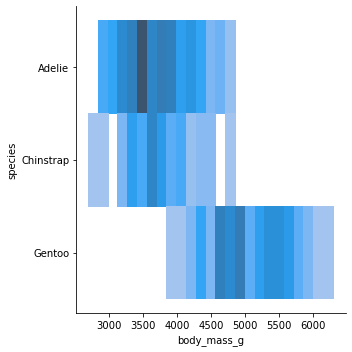

In [189]:
penguins = sns.load_dataset("penguins")
plt.figure(figsize=(10,8))
sns.displot(penguins, 
            x="body_mass_g", y="species",
            bins=25)
penguins

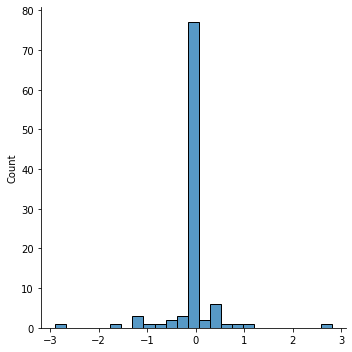

In [90]:
differences = [0.0, 0.0, -1.0, 0.0, -0.2, -1.2, 0.0, 0.0, 0.0, 0.0, -2.9, 0.0, 0.0, 0.0, 0.0, -0.3, 0.5, 0.0, 0.0, -1.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, -1.7, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 0.0, 1.2, 0.0, 0.0, -0.74, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.5, -0.38, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, 0.0, 0.0, 2.8, 0.0, 0.0, 0.0, -0.1, 0.0, -1.3, 0.0, 0.2, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, -0.5, 0.0, 0.3, 0.0, 0.0, 0.0]
sns.displot(differences,             
            bins=25)